# Práctica 1 PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA SOLAR

Autores: Joaquín García Pozo 100451183
         Andrés Rodríguez García 100451253

# Índice
1) Enlace del repositorio
2) Lectura del conjunto de datos
3) Análisis Exploratorio de Datos (EDA)
4) División de los datos
5) Métodos básicos
6) Dimensionalidad del problema
7) Métodos avanzados
8) Modelo final


# 1) Enlace del repositorio

Esta práctica está alojada en el siguiente repositorio:
https://github.com/100451183/Grupo8_Practica1.git

En este repositorio están registrados todos los cambios que se han ido realizando a lo largo del desarrollo de la práctica

# 2) Lectura del conjunto de datos

Se leen los datos correspondientes al número de grupo, en nuestro caso el 8

In [9]:
# Primero hay que ejecutar imports

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import LinearSVC, SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint


import pickle
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, PredefinedSplit, RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from matplotlib import style
from sklearn.inspection import permutation_importance
import multiprocessing

In [11]:
disp_df = pd.read_csv("disp_st8ns1.txt.bz2", compression="bz2", index_col=0)

# 3) Análisis exploratorio de datos

Con el objetivo de comprender los datos en términos de su distribución, estadísticas descriptivas, patrones y posibles 
relaciones entre variables se realiza un análisis exploratorio de datos (EDA). Ayuda a identificar datos atípicos o errores en los datos.
Permite seleccionar las variables más importantes del modelo.

In [12]:
# Se muestra el contenido del dataframe
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [13]:
# Se visualiza una muestra aleatoria de los datos
print(disp_df.sample(6))

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V60      1.641818    0.351818    1.026364    0.356364    0.486364  327.765858   
V765     0.000000    0.000000    0.000000    0.000000    0.000000  154.335406   
V3430    0.000000    0.000000    0.000000    0.000000    0.000000  315.120564   
V3103    0.009091    0.028182    0.463636    0.292727    0.295455  375.473733   
V3502    0.229091    0.464545    0.462727    0.000000    0.000000  381.179921   
V1251    0.143636    0.156364    0.175455    0.077273    0.099091  372.438033   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V60    315.466924  314.747364  311.843301  308.870636  ...  188.767104   
V765   152.760176  157.433634  176.170327  180.465952  ...  199.677268   
V3430  332.081879  344.528207  375.027949  375.355924  ...  263.742462   
V3103  382.950858  392.497498  409.431982  405.399045  ...  279.592041   
V3502  398.904885  407.572071  431.601221  435.320509  ...  25

In [14]:
# Se visualizan los 9 primeros registros de datos
print(disp_df.head(9))

    apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1    0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2    0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3    0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4    0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5    0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
V6    0.000000    0.000000    0.000000    0.003636    0.022727  262.650191   
V7    0.000000    0.000000    0.000000    0.000000    0.000000  241.442841   
V8    0.000000    0.000000    0.000000    0.000000    0.000000  208.358092   
V9    0.000000    0.000000    0.000000    0.000000    0.001818  224.955149   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1  246.514368  251.629031  264.832217  262.468350  ...  249.504475   
V2  282.460488  297.254822  315.532651  310.292719  ...  200.094627   
V3  21

Se imprimen varias muestras de los datos para observar la magnitud de estos. Observamos también la relación de los atributos
de entrada con la salida. 

In [15]:
# Número de filas y columnas del conjunto de datos
print(disp_df.shape)

# Tipos de las variables
print(disp_df.dtypes)

(4380, 76)
apcp_sf1_1    float64
apcp_sf2_1    float64
apcp_sf3_1    float64
apcp_sf4_1    float64
apcp_sf5_1    float64
               ...   
uswrf_s2_1    float64
uswrf_s3_1    float64
uswrf_s4_1    float64
uswrf_s5_1    float64
salida          int64
Length: 76, dtype: object


In [16]:
# Observar valores nulos. En esta primera sentencia se observan en una tabla
# valores booleanos que especifican si ese campo es nulo.
print(disp_df.isnull())

# Se contabilizan los valores nulos.
print(disp_df.isnull().sum())

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1          False       False       False       False       False       False   
V2          False       False       False       False       False       False   
V3          False       False       False       False       False       False   
V4          False       False       False       False       False       False   
V5          False       False       False       False       False       False   
...           ...         ...         ...         ...         ...         ...   
V4376       False       False       False       False       False       False   
V4377       False       False       False       False       False       False   
V4378       False       False       False       False       False       False   
V4379       False       False       False       False       False       False   
V4380       False       False       False       False       False       False   

       dlwrf_s2_1  dlwrf_s3

No hay valores nulos en el conjunto de datos. En el caso en el que hubieran habría que imputarlos o eliminarlos. Hay que tener en cuenta
que debido a la existencia de múltiples valores nulos, su eliminación podría llevar a la pérdida de información importante y afectar negativamente al análisis o modelo

In [17]:
print(disp_df.value_counts())

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  dswrf_s2_1  dswrf_s3_1  dswrf_s4_1  dswrf_s5_1  pres_ms1_1     pres_ms2_1     pres_ms3_1     pres_ms4_1     pres_ms5_1     pwat_ea1_1  pwat_ea2_1  pwat_ea3_1  pwat_ea4_1  pwat_ea5_1  spfh_2m1_1  spfh_2m2_1  spfh_2m3_1  spfh_2m4_1  spfh_2m5_1  tcdc_ea1_1  tcdc_ea2_1  tcdc_ea3_1  tcdc_ea4_1  tcdc_ea5_1  tcolc_e1_1  tcolc_e2_1  tcolc_e3_1  tcolc_e4_1  tcolc_e5_1  tmax_2m1_1  tmax_2m2_1  tmax_2m3_1  tmax_2m4_1  tmax_2m5_1  tmin_2m1_1  tmin_2m2_1  tmin_2m3_1  tmin_2m4_1  tmin_2m5_1  tmp_2m_1_1  tmp_2m_2_1  tmp_2m_3_1  tmp_2m_4_1  tmp_2m_5_1  tmp_sfc1_1  tmp_sfc2_1  tmp_sfc3_1  tmp_sfc4_1  tmp_sfc5_1  ulwrf_s1_1  ulwrf_s2_1  ulwrf_s3_1  ulwrf_s4_1  ulwrf_s5_1  ulwrf_t1_1  ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  uswrf_s4_1  uswrf_s5_1  salida  
0.000000    0.000000    0.000000    0.000000    0.000000    154.335406  152.

El siguiente comando proporciona una descripción estadística de los datos en términos de su tendencia central, dispersión y forma de distribución. También muestra información útil para comprender la distribución de los datos.

In [18]:
disp_df.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.708567,0.293943,0.525002,0.260699,0.530149,314.901998,315.658584,323.094642,342.390701,341.641629,...,244.779701,248.995312,258.995144,258.164788,0.138979,40.085803,77.038377,125.458012,97.172893,1.594500e+07
std,2.599816,1.211324,1.900262,1.000023,1.975711,56.241545,58.376389,59.334196,61.733754,61.695498,...,37.662362,37.157497,39.951473,39.538514,0.337704,27.012235,32.117291,43.376068,36.612104,8.112528e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,154.335406,152.760176,157.433634,175.691114,173.524779,...,115.091405,118.820144,109.060597,116.585080,0.000000,0.090909,2.909091,4.818182,2.727273,7.470000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,268.206411,267.874264,274.796959,292.816105,291.259751,...,227.355142,231.339967,240.989062,239.332283,0.000000,14.727273,52.613636,104.909091,71.000000,9.667200e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.405290,319.207540,326.240827,345.789484,344.639153,...,250.098898,254.305866,267.363606,265.883269,0.000000,37.000000,80.318182,134.545455,102.727273,1.565535e+07
75%,0.138409,0.047500,0.140909,0.038182,0.092955,364.984977,368.697012,376.999899,398.002730,396.524137,...,273.489209,277.242391,288.239120,287.865822,0.000000,63.750000,104.090909,154.181818,127.818182,2.299088e+07
max,51.623637,22.934545,32.982727,15.975455,39.899091,422.276065,427.649256,430.104545,460.657246,461.183133,...,311.586634,313.781505,324.802854,325.166243,1.000000,102.000000,283.818182,483.090909,294.818182,3.170220e+07


# 4) Datos

Los datos se componen de 15 variables meteoriológicas por 5 instantes de tiempo más la variable de salida. Se trabajan con datos de 12 años. 8 años se utilizan para entrenar el modelo, 2 años para el conjunto de validación y 2 años para el conjunto de prueba.

In [19]:
# Se normalizan los datos,lo que puede mejorar la precisión del modelo
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(disp_df)
df_normalized = pd.DataFrame(normalized_data, columns=disp_df.columns)

# Separar datos de entrenamoiento y test, 10 y 2 años respectivamente
X_train, X_test, y_train, y_test = train_test_split(df_normalized.iloc[:, :-1], df_normalized.iloc[:, -1],
                                                    train_size=3650, shuffle=False)

X = df_normalized.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]

# Los indices que tienen valor -1 se mantienen en entrenamiento
train_indices = np.full((2920,), -1, dtype=int)

# Los indices con valor mayor o igual que 0 se mantienen en validación
val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)

# Se usan indices predefinidos en lugar de hacer una división aleatoria
ps = PredefinedSplit(test_fold)



## 5) Métodos básicos

Las métricas a evaluar en todos los métodos son el error absoluto medio (MAE), medida de distancia entre las predicciones y los valores reales, y la raíz cuadrada del error cuadrático medio (RSME), que mide la raíz cuadrada media de los errores entre los valores predichos y los valores reales. Se ha decido también añadir el estudio de la métrica de r2_score, que se basa en la comparación entre la varianza de los valores predichos por el modelo y la varianza de los valores reales del conjunto de datos.

## KNN

K-Nearest Neighbors (K-NN) es un algoritmo de aprendizaje automático. En esta caso, regresión, la predicción se basa en la media de los valores objetivo de las K instancias más cercanas.  

In [20]:
# KNN con hiperparámetros por omisión

# Crear el objeto KNeighborsRegressor
knn = KNeighborsRegressor()

# Fijar la semilla para que el método sea reproducible
np.random.seed(53)

# Entrenar el modelo con los datos de entrenamiento y medir el tiempo
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

# Realizar predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)

# Calcular las métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.7531127290996391
Error cuadrático medio (MSE): 0.014280138590811191
Raíz cuadrada del error cuadrático medio (RMSE): 0.11949953385185731
Mean Absolute Error (MAE): 0.07896182977576086
Tiempo de entrenamiento: 0.00299072265625


Los resultados son relativamente bajos, se espera que en el ajuste de hiperparámetros se reduzcan los errores

## KNN evaluado con MAE

Se evalua el modelo según MAE. Los hiperparámetros a ajustar son:
- n_neighbors: el número de vecinos más cercanos para predecir el valor de salida.
- weights: la forma en que se ponderarán los vecinos más cercanos en la predicción. "uniforme", todos los vecinos tienen el mismo peso o "distancia", los vecinos más cercanos tienen más peso que los más lejanos.
- metric: la medida de distancia que se utilizará para calcular la distancia entre los ejemplos. Las distancias son Manhattan, Euclidiana y Minkowski.
- algorithm: El algoritmo que se utilizará para buscar los vecinos más cercanos. Puede ser "ball_tree" (árbol de bolas), "kd_tree" (árbol k-dimensional), "brute" (fuerza bruta) o "auto" (selecciona automáticamente el mejor algoritmo según los datos de entrada).

Mediante la búsqueda gridsearch se extraen los hiperparámetros que mejor se ajustan. Se selecciona un scoring en mae para que se pueda mejorar esa métrica.

In [21]:
param_grid = {'n_neighbors': np.arange(1, 45),
              'weights': ['uniform', 'distance'],
              'metric': ['manhattan', 'euclidean', 'minkowski'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_mean_absolute_error",
                   cv=ps,
                   n_jobs = -1,
                   verbose = 1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.07358321881246135
Coeficiente de determinación del modelo: 0.7703187754760225
Error cuadrático medio (MSE): 0.013284928404564526
Raíz cuadrada del error cuadrático medio (RMSE): 0.11526026377101749
Mean Absolute Error (MAE): 0.07551555690923561
Tiempo de entrenamiento: 41.544163942337036


Se observa que los resultados mejoran respecto al método knn sin hiperparámetros ajustados. Las medidas de rmse y mae son inferiores y el resultado de r2_score ha mejorado, indicando que se ha producido una mejora en la predicción del modelo. El tiempo de entrenamiento es superior debido al que hay que realizar búsqueda gridsearch, lo que lo incremente. A esto se suma la cantidad de hiperparámetros a probar. El número de vecinos es acorde al tamaño del problema, ya que menos podría llevar al sobreajuste y formar un modelo complejo. Por el contrario, si es un número muy grande el modelo será demasiado simple y de bajo ajuste.

## KNN evaluado con RMSE

Se evalua con RMSE. Los hiperparámetros a ajustar son los mismos que en el ajuste anterior, al igual que las métricas.

In [22]:
param_grid = {'n_neighbors': np.arange(1, 45),
                'weights': ['uniform', 'distance'],
                'metric': ['manhattan', 'euclidean', 'minkowski'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_root_mean_squared_error",
                   cv=ps,
                   n_jobs = 1,
                   verbose = 1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.10253318544475379
Coeficiente de determinación del modelo: 0.7694706415628323
Error cuadrático medio (MSE): 0.013333985084480643
Raíz cuadrada del error cuadrático medio (RMSE): 0.11547287596869077
Mean Absolute Error (MAE): 0.07577196300579321
Tiempo de entrenamiento: 108.19323396682739


Las métricas de error muestran resultados inferiores a knn sin ajustar. El coeficiente de determinación del modelo es inferior que el de la evaluación MAE, y superior al knn sin ajustar. El tiempo de entrenamiento es superior al de los demás métodos. El número de vecinos ha aumentado respecto al anterior, no de manera significativa como para que se considere sobreajustado.

## Árbol de regresión

Un árbol de regresión es un modelo de aprendizaje automático que se utiliza para predecir valores numéricos. Divide los datos en subconjuntos más pequeños, de tal manera que cada subconjunto se ajuste a una línea recta o a una función polinómica. El proceso de construcción del árbol se basa en la identificación de las características más importantes para la predicción de la variable objetivo y en la división de los datos en subconjuntos que maximizan la reducción del error de la predicción.

In [23]:
# Árbol de regresión con hiperparametros por omision

# Crear el objeto KNeighborsRegressor
regressor = DecisionTreeRegressor()

# Fijar la semilla para que el método sea reproducible
np.random.seed(53)

# Entrenar el modelo con los datos de entrenamiento y medir el tiempo
start_time = time.time()
regressor.fit(X_train, y_train)
end_time = time.time()

# Realizar predicciones sobre los datos de prueba
y_pred = regressor.predict(X_test)

# Calcular las métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.6282810075387413
Error cuadrático medio (MSE): 0.021500495792372242
Raíz cuadrada del error cuadrático medio (RMSE): 0.14663047361436246
Mean Absolute Error (MAE): 0.10441666496665486
Tiempo de entrenamiento: 0.43370771408081055


Este método tiene un coeficiente de determinación bajo, lo que demuestra que no se está ajustando bien. Los errores MAE y RMSE son incialmente altos. El tiempo de entrenamiento resulta ser inferior a los anteriores

# Arbol de regresión evaluado con MAE

Primero se evalua con MAE. Los hiperparámetros a ajustar son los siguientes:
- max_depth: la profundidad máxima del árbol.
- min_samples_split: el número mínimo de muestras requerido para dividir un nodo interno.
- min_samples_leaf: el número mínimo de muestras requerido en cada hoja del árbol.

Se realiza gridsearch para la búsqueda de hiperparámetros

In [24]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = -1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mejor puntuación de validación cruzada: 0.0805696781549923
Coeficiente de determinación del modelo: 0.7615777119041722
Error cuadrático medio (MSE): 0.013790517853473332
Raíz cuadrada del error cuadrático medio (RMSE): 0.1174330356138056
Mean Absolute Error (MAE): 0.08017556058769537
Tiempo de entrenamiento: 6.823415756225586


Todas las métricas han mejorado bastante, debido principalmente a que se han ajustado los mejores hiperparámetros. El coeficiente de determinación supera al arbol de regresión sin ajustar. El tiempo de entrenamiento ha aumentado debido a la búsqueda de hiperparámetros realizada.

# Arbol de regresión evaluado con RMSE

Se evalua con RMSE. Los hiperparámetros a ajustar son los mismos que en el ajuste anterior, al igual que las métricas.

In [25]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = -1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}
Mejor puntuación de validación cruzada: 0.1125531689530455
Coeficiente de determinación del modelo: 0.7575498513558881
Error cuadrático medio (MSE): 0.01402349222531598
Raíz cuadrada del error cuadrático medio (RMSE): 0.11842082682246388
Mean Absolute Error (MAE): 0.08072203160265878
Tiempo de entrenamiento: 6.326637268066406


Las medidas están empeorando en comparación con la evaluación en MAE. Esto se debe principalmente a la sensibilidad a que RMSE es más sensible a valores extremos. Dado que hay valores extremos, no se está ajustando muy bien el modelo, o al menos mejor que MAE

## Regresión lineal

La regresión lineal es un algoritmo de aprendizaje supervisado en el campo del aprendizaje automático que se utiliza para predecir una variable de salida continua (también llamada variable dependiente) en función de una o más variables de entrada (también llamadas variables independientes o características). Se ajusta una línea recta a los datos de entrenamiento para modelar la relación entre las variables de entrada y la variable de salida. Luego, se utiliza esta línea recta para hacer predicciones sobre la variable de salida en nuevos datos. El objetivo de la regresión lineal es encontrar los coeficientes de la línea recta que mejor se ajusten a los datos de entrenamiento.

In [26]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Función que dibuja la gráfica
def pintaResultados(reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test.size)
  pred = reg.predict(X=X_test)
  plt.plot(x, pred[:n], 'g^', x, y_test[:n], 'b.')

Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.051079750061035156


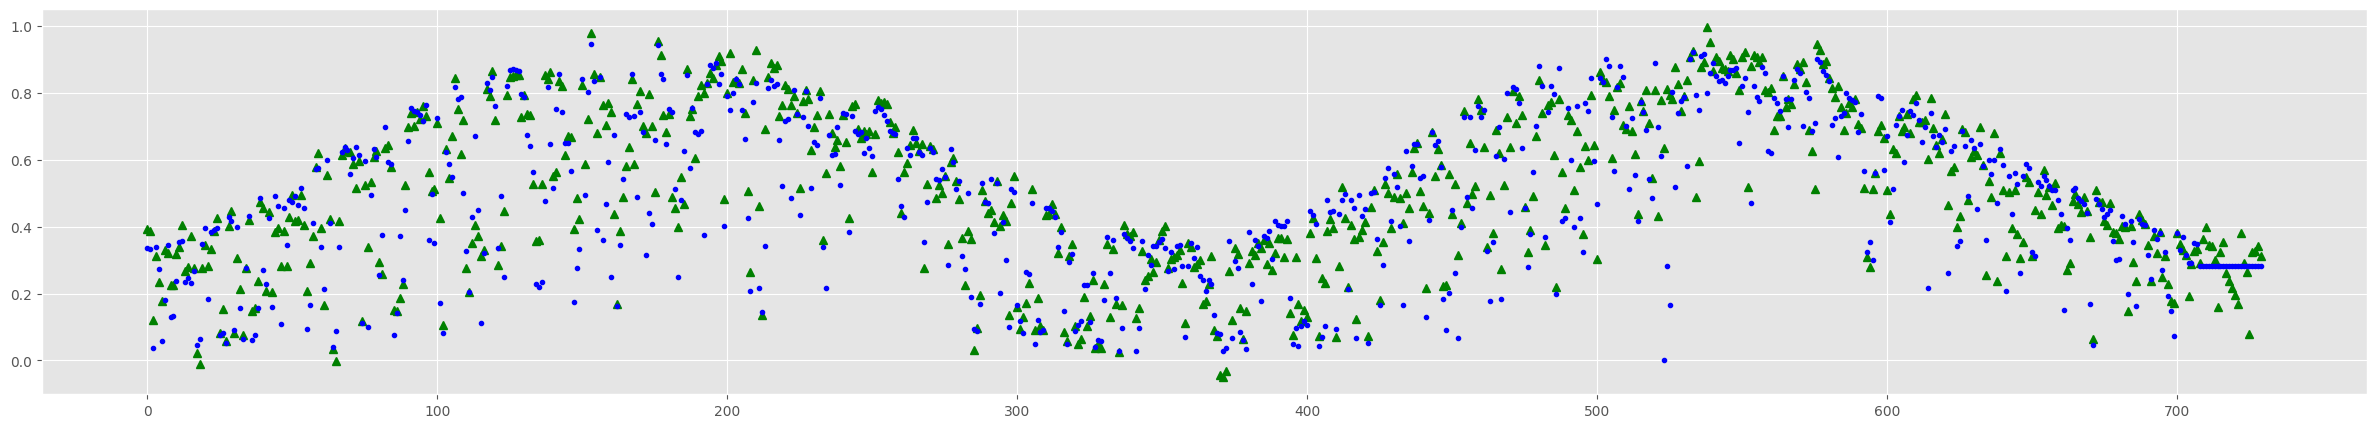

In [27]:
reg_lin = LinearRegression()

np.random.seed(53)
start_time = time.time()
reg_lin.fit(X_train, y_train)
end_time = time.time()

y_pred = reg_lin.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(reg_lin, 730)


Se observa que la predicción (triángulos verdes) se ajusta en mayor medida a los datos (puntos azules). Las métricas de errores dan buenos resultados en comparación a otros métodos. Esto demuestra que podría ser un buen método de regresión. Procedemos a evaluar con diferentes métricas de error.

# Regresión lineal evaluada con MAE

Se evalua la regresión lineal con MAE. Los hiperparámetros son:
- fit_intercept: determina si se debe ajustar o no una ordenada al origen. Si es True, se ajusta una ordenada al origen; si es False, no se ajusta.

Fitting 1 folds for each of 2 candidates, totalling 2 fits
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 0.06833621104178994
Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.18681073188781738


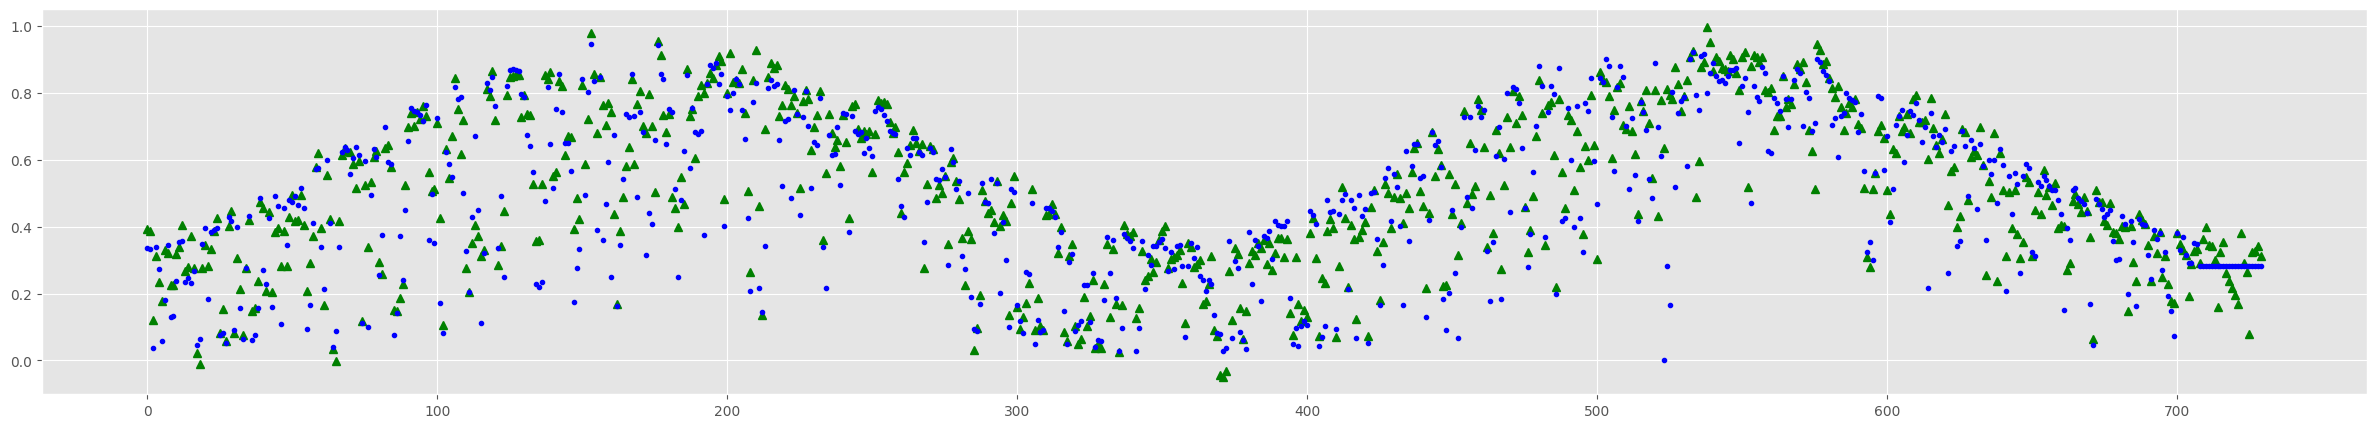

In [28]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = -1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid_search, 730)

Estos resultados coinciden exactamente con los de la regresión lineal con hiperparámetros por omisión. Esto se debe a que al evaluarse con un solo hiperparámetro es muy probable que coincida el ajuste en los dos apatados, que es de hecho, lo que está pasando.

## Regresión lineal evaluada con RMSE

Se evalua la regresión lineal con RMSE. Los hiperparámetros son los mismos que se ajustan en el apartado anterior.

Fitting 1 folds for each of 2 candidates, totalling 2 fits
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 0.09471688711442858
Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.18482494354248047


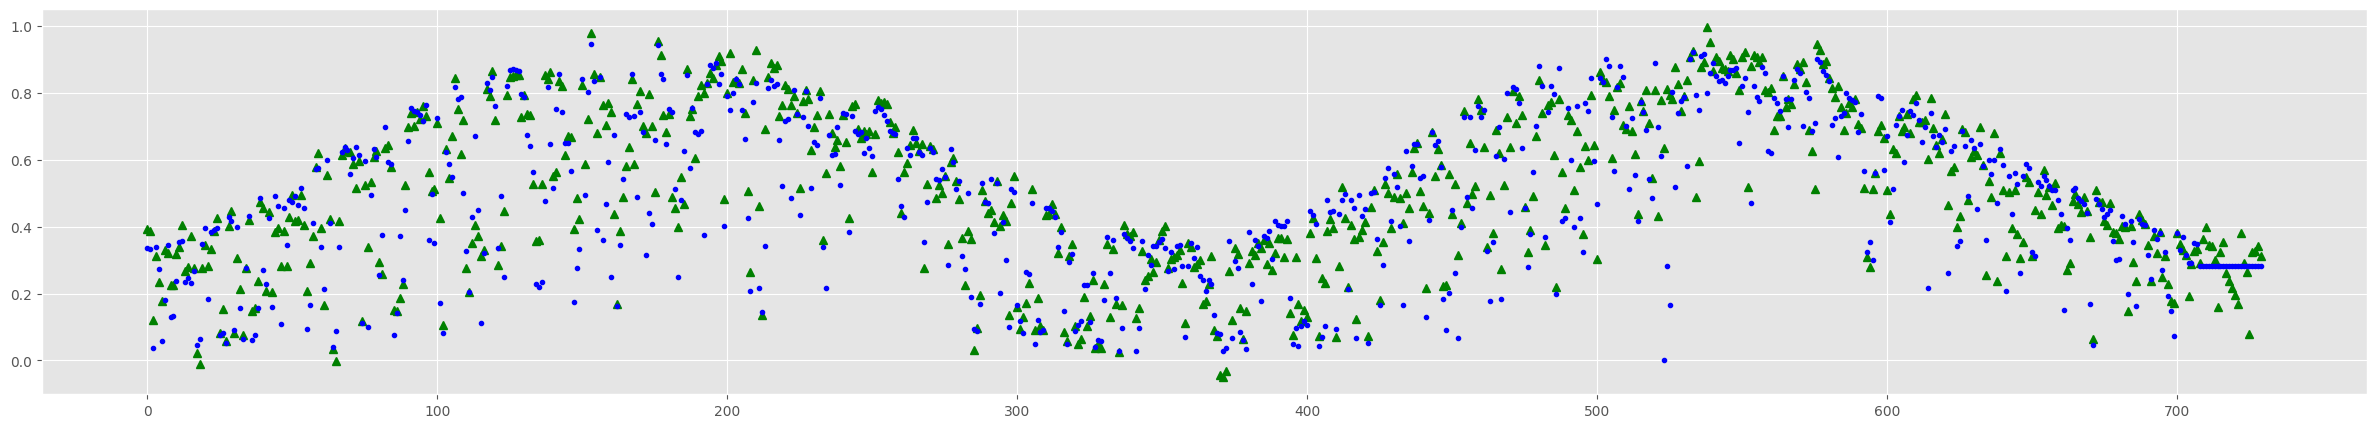

In [29]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = -1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid_search, 730)

Los resultados son iguales al de los otros apartados, por el mismo motivo.

# Minimos cuadrados

Mínimos cuadrados es un método matemático utilizado para encontrar la mejor línea que se ajuste a un conjunto de datos. Se busca una línea que mejor se ajuste a un conjunto de datos para predecir el valor de una variable dependiente en función de una o varias variables independientes.
Minimiza la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.18482494354248047


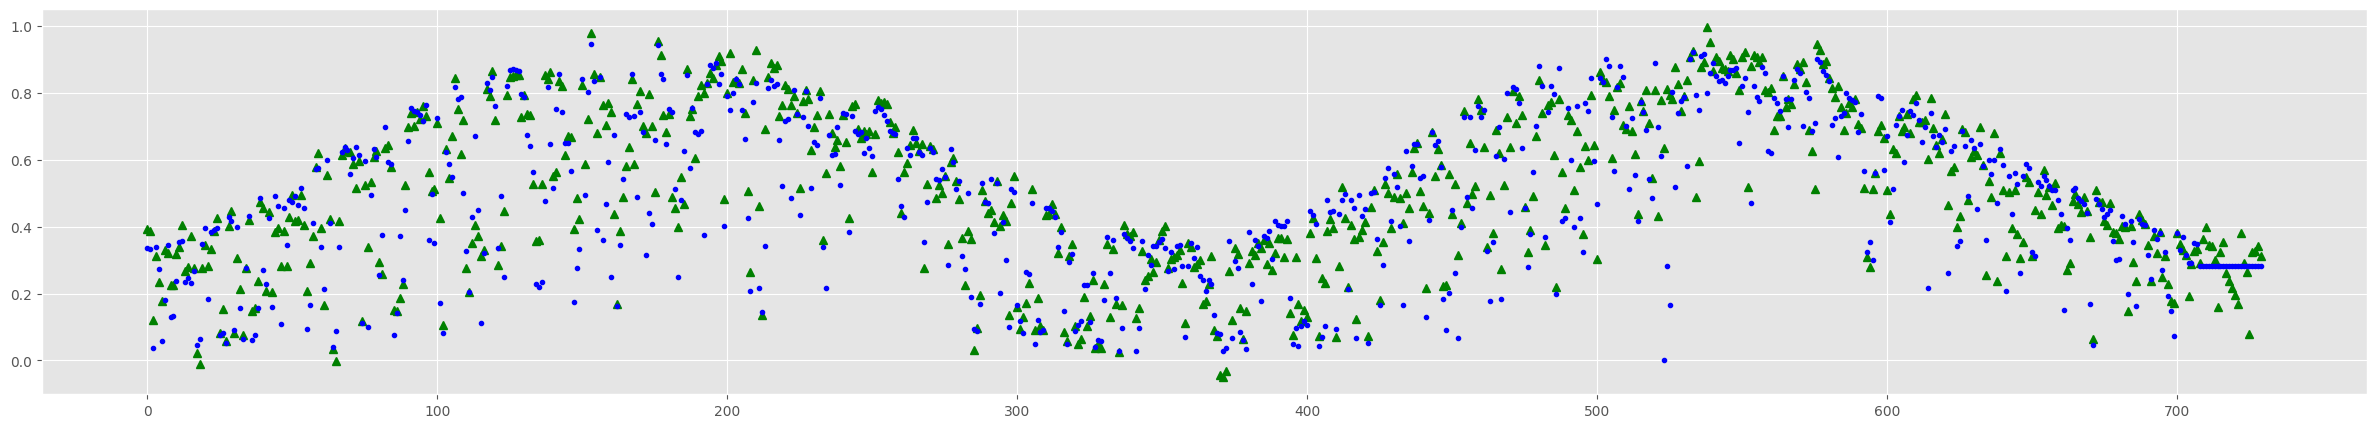

In [30]:
scaler = StandardScaler()
reg_lin = LinearRegression()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('REGL', reg_lin)])

np.random.seed(53)

start_time = time.time()
pipe_regr.fit(X_train, y_train)
end_time = time.time()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(pipe_regr,730)

Los resultados coinciden con los obtenidos en la regresión lineal, lo cual es lo esperable puesto que se utiliza el mismo método. La regresión lineal es un modelo matemático que utiliza los mínimos cuadrados como método para ajustar los parámetros de la línea recta

# Ridge

Ridge es un algoritmo de aprendizaje automático de regresión que se utiliza para predecir una variable de salida continua en función de múltiples variables de entrada.

Coeficiente de determinación del modelo: 0.8016020948206146
Error cuadrático medio (MSE): 0.011475478552442854
Raíz cuadrada del error cuadrático medio (RMSE): 0.10712366009637111
Mean Absolute Error (MAE): 0.07034805011243983
Tiempo de entrenamiento: 0.18482494354248047


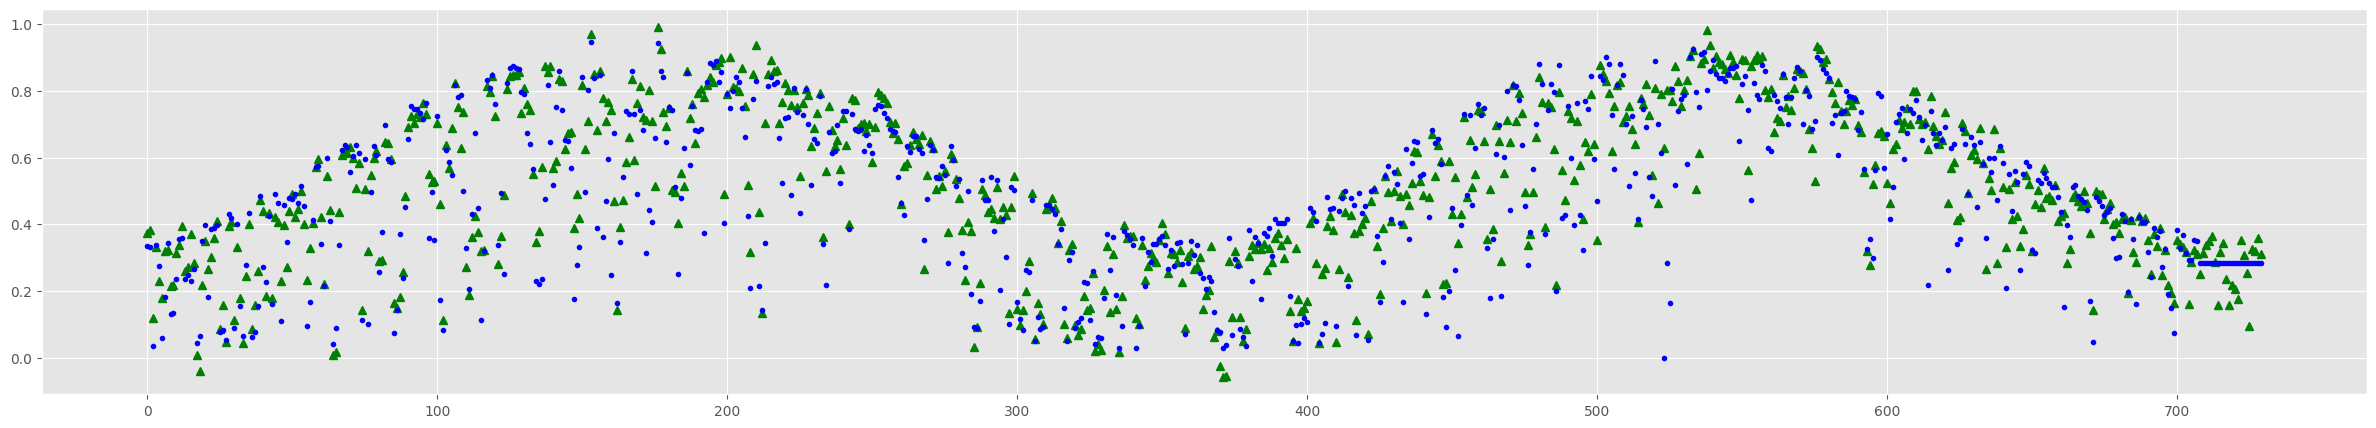

In [31]:
regrRidge = Ridge()

start_time = time.time()
regrRidge.fit(X_train, y_train)
end_time = time.time()

y_pred = regrRidge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(regrRidge, 730)


Los resultados de las métricas de error son ligeramente superiores a la regresión lineal básica. El error MAE es inferior. A continuación se prueba con el parámetro de regularización alpha. Es un hiperparámetro que se ajusta en el proceso de entrenamiento del modelo para encontrar el mejor valor que maximiza su rendimiento en los datos de entrenamiento y, al mismo tiempo, evita el sobreajuste.

Coeficiente de determinación del modelo: 0.8022645991983623
Error cuadrático medio (MSE): 0.011437158819324358
Raíz cuadrada del error cuadrático medio (RMSE): 0.10694465306561314
Mean Absolute Error (MAE): 0.07051616410009093
Tiempo de entrenamiento: 0.18482494354248047
Mejor alpha encontrado: 0.001135733358343105


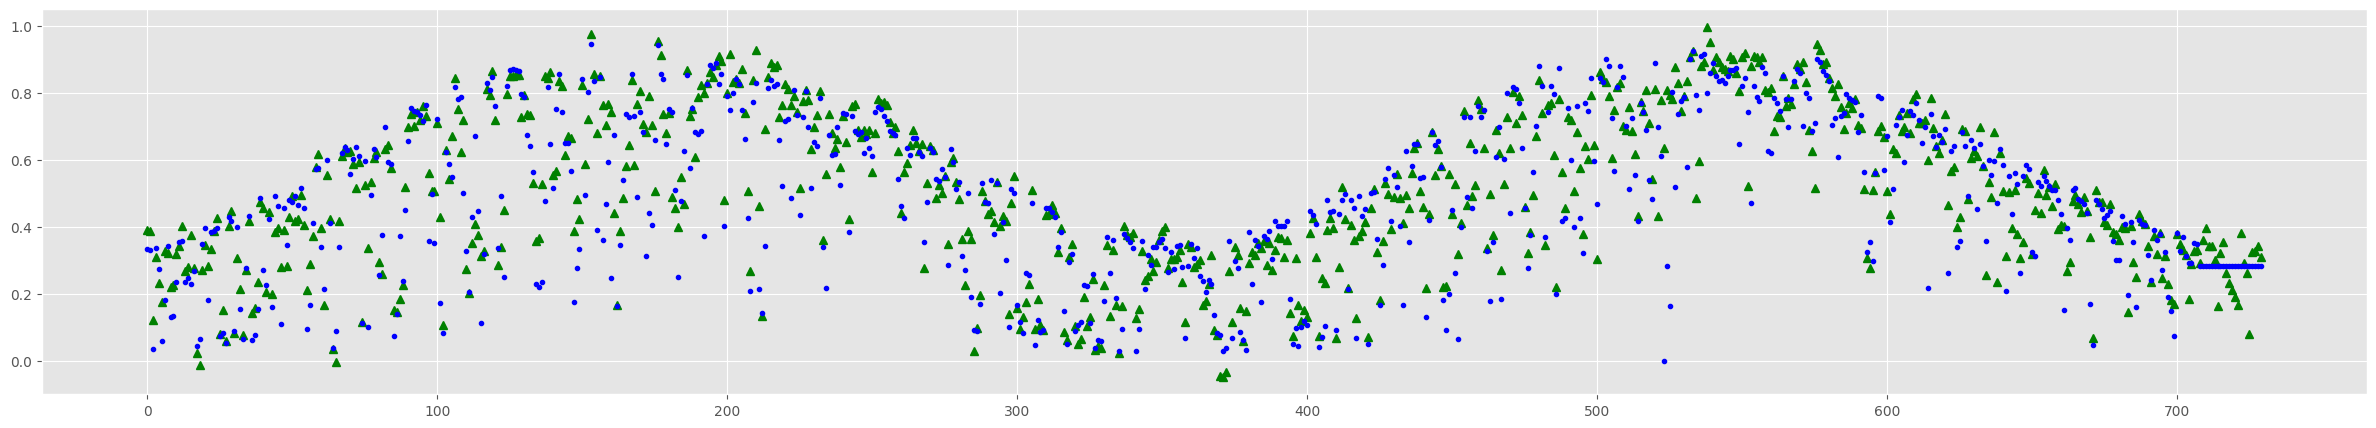

In [32]:
regrRidge = RidgeCV(
            alphas = np.logspace(-3, 8, 200),
            cv = ps
         )

start_time = time.time()
regrRidge.fit(X_train, y_train)
end_time = time.time()

y_pred = regrRidge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
best_alpha = regrRidge.alpha_

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrRidge, 730)

El modelo se ha ajustado correctamente a los hiperparámetros introducidos puesto que las métricas se han reducido en comparación con el modelo con hiperparámetros por omisión.

A continuación se realiza una gráfica que muestra cómo cambian los coeficientes del modelo en función del parámetro de regularización alpha. En cada iteración del bucle se entrena un modelo Ridge con un valor específico de alpha y se almacenan los coeficientes del modelo en una lista

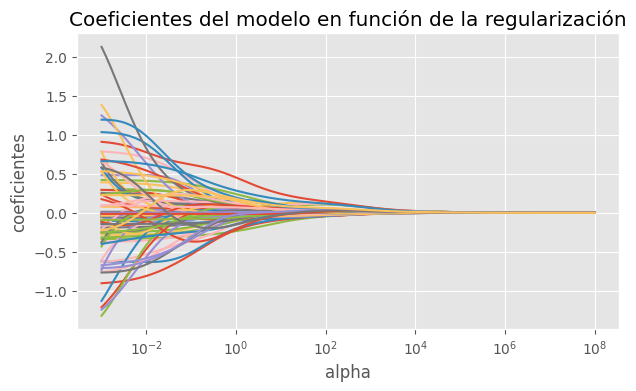

In [33]:
# Coeficientes en función de la regularización
alphas = regrRidge.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

La gráfica permite determinar el valor óptimo de alpha para el modelo, que es aquel que equilibra el ajuste del modelo con la complejidad. A medida que aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se estabiliza.

El siguiente gráfico muestra los coeficientes de la regresión Ridge, lo que permite ver cómo afecta la regularización a los coeficientes del modelo.

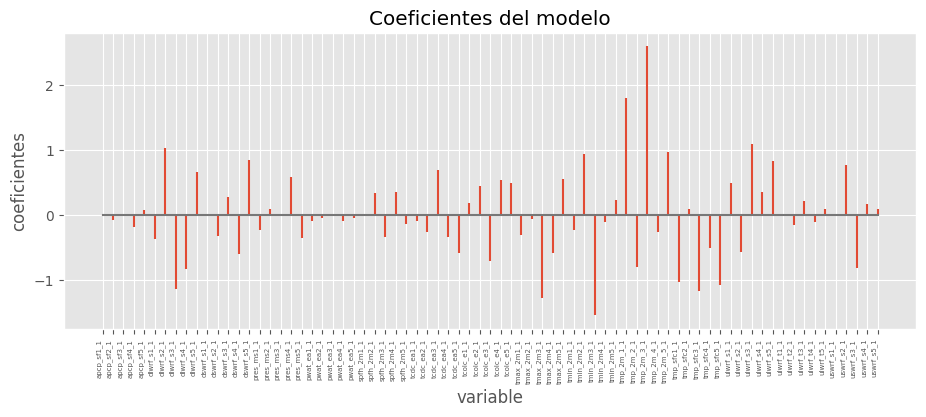

In [34]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': df_normalized.columns[:-1],
                         'coef': regrRidge.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

El orden de magnitud de los coeficientes es alto, seguimos comparando para observar la evolución en los otros métodos

# Lasso

Lasso es un método de regresión lineal que utiliza la regularización L1 para reducir la complejidad del modelo y evitar el sobreajuste del modelo. La regresión Lasso minimiza la suma de los valores absolutos de los errores.

In [35]:
regrLasso = Lasso()

start_time = time.time()
regrLasso.fit(X_train, y_train)
end_time = time.time()

y_pred = regrLasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)


Coeficiente de determinación del modelo: -0.006035870895336082
Error cuadrático medio (MSE): 0.05818984353191226
Raíz cuadrada del error cuadrático medio (RMSE): 0.241225710760508
Mean Absolute Error (MAE): 0.2064118470056304
Tiempo de entrenamiento: 0.18482494354248047


Los resultados son superiores a todos los modelos, a parte de dar una medida incoherente en r2_score. Esto puede ser por la alta correlación de las variables predictoras, provocando características inconsistentes o irrelevantes.

A continuación se introduce el hiperparámetro alpha para ajustarlo y obtener el modelo

Coeficiente de determinación del modelo: 0.8028294002342776
Error cuadrático medio (MSE): 0.01140449031827248
Raíz cuadrada del error cuadrático medio (RMSE): 0.10679180829198688
Mean Absolute Error (MAE): 0.07074435790450453
Tiempo de entrenamiento: 0.18482494354248047
Mejor alpha encontrado: 4.2475715525368944e-08


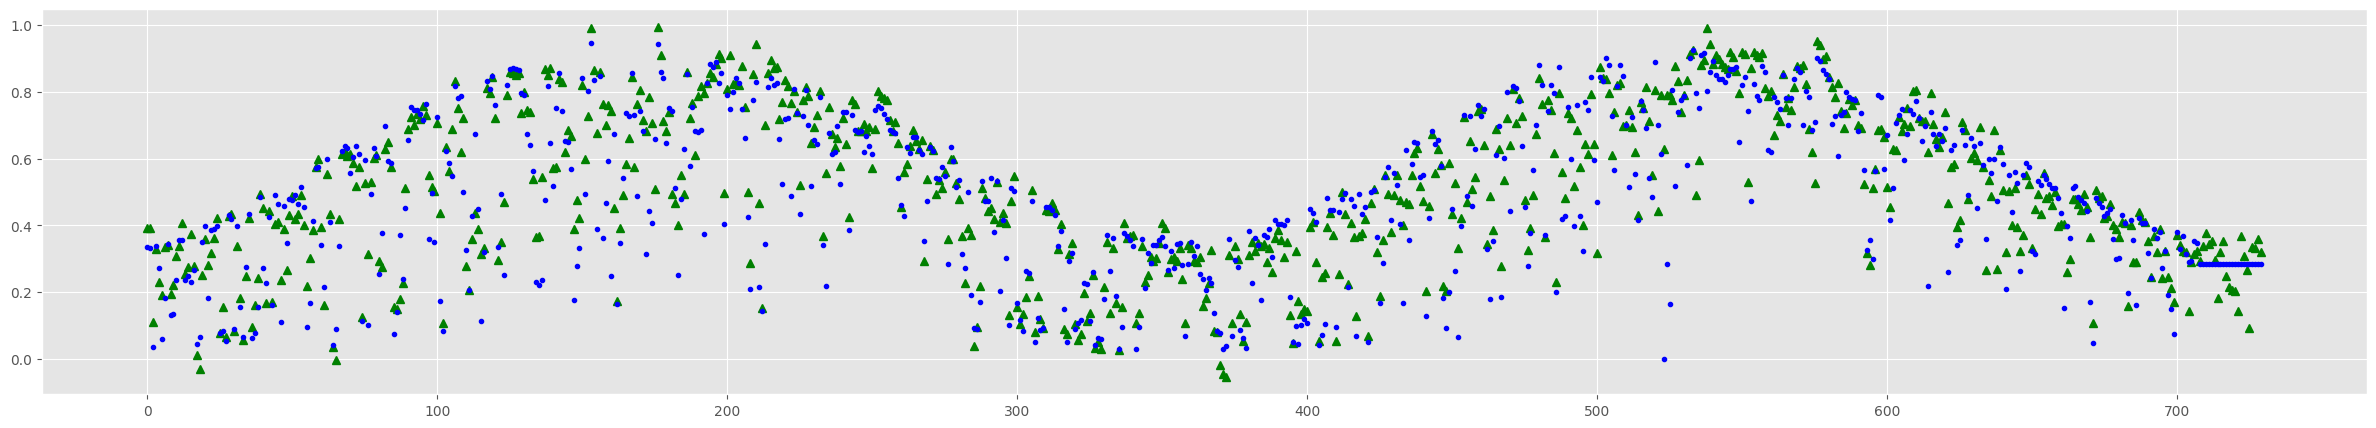

In [36]:
regrLasso = LassoCV(
            alphas          = np.logspace(-9, 3, 200),
            cv              = ps
         )

start_time = time.time()
regrLasso.fit(X_train, y_train)
end_time = time.time()

y_pred = regrLasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrLasso.alpha_
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrLasso, 730)

Los resultados ahora son mejores que el método con hiperparámetros. El método predice de manera adecuada la salida y tiene una buena medida el r2_score.

Se realiza una gráfica que muestra cómo cambian los coeficientes del modelo en función del parámetro de regularización alpha

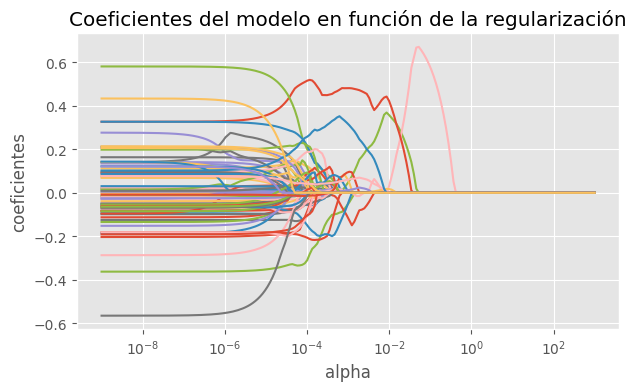

In [37]:
alphas = regrLasso.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

A medida que aumenta el valor de alpha, la regularización es mayor. En este caso la estabilización no es progresiva y hay valores que resultan estar alterados.

El siguiente gráfico muestra los coeficientes de la regresión Lasso

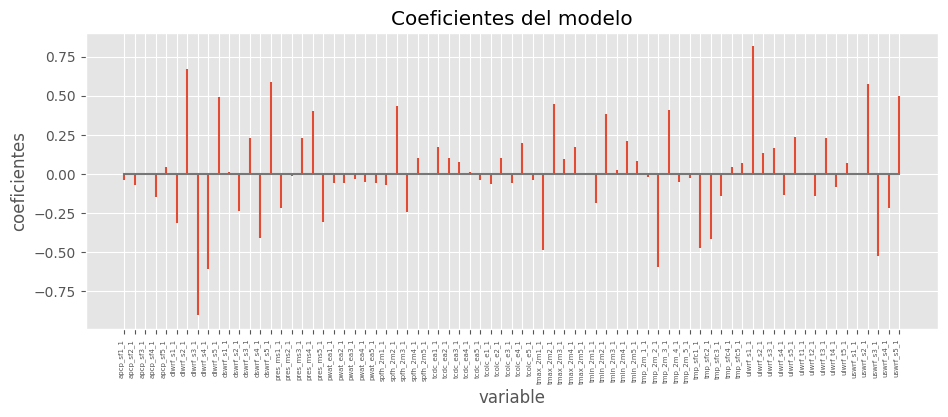

In [38]:
df_coeficientes = pd.DataFrame(
                        {'predictor': df_normalized.columns[:-1],
                         'coef': regrLasso.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Los coeficientes del modelo no son tan altos como en los métodos evaluados anteriormente.

# ElasticNet

Elastic Net es un método de regularización utilizado en regresión lineal y modelos lineales relacionados. combina la fuerza de la regularización L1 en la selección de características con la regularización L2 para mejorar la estabilidad del modelo y reducir la varianza. La cantidad relativa de L1 y L2 en la función de pérdida se controla mediante el parámetro de elasticidad "l1_ratio".

In [39]:
regrElastic = ElasticNet()

start_time = time.time()
regrElastic.fit(X_train, y_train)
end_time = time.time()

y_pred = regrElastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)

Coeficiente de determinación del modelo: -0.006035870895336082
Error cuadrático medio (MSE): 0.05818984353191226
Raíz cuadrada del error cuadrático medio (RMSE): 0.241225710760508
Mean Absolute Error (MAE): 0.2064118470056304
Tiempo de entrenamiento: 0.18482494354248047
Mejor alpha encontrado: 4.2475715525368944e-08


Este método tiene resultados incoherentes en su evaluación, por lo que se descarta este ajuste. Ahora probaremos con algunos hiperparámetros, como alphas, ya explicado anteriormente, y l1_ratio, que ajusta la fuerza de la regularización y el tipo de regularización en el modelo ElasticNet.

Coeficiente de determinación del modelo: 0.8027341994800896
Error cuadrático medio (MSE): 0.011409996798856905
Raíz cuadrada del error cuadrático medio (RMSE): 0.10681758656165614
Mean Absolute Error (MAE): 0.07071343501040717
Tiempo de entrenamiento: 0.18482494354248047
Mejor alpha encontrado: 5.872786613189489e-06


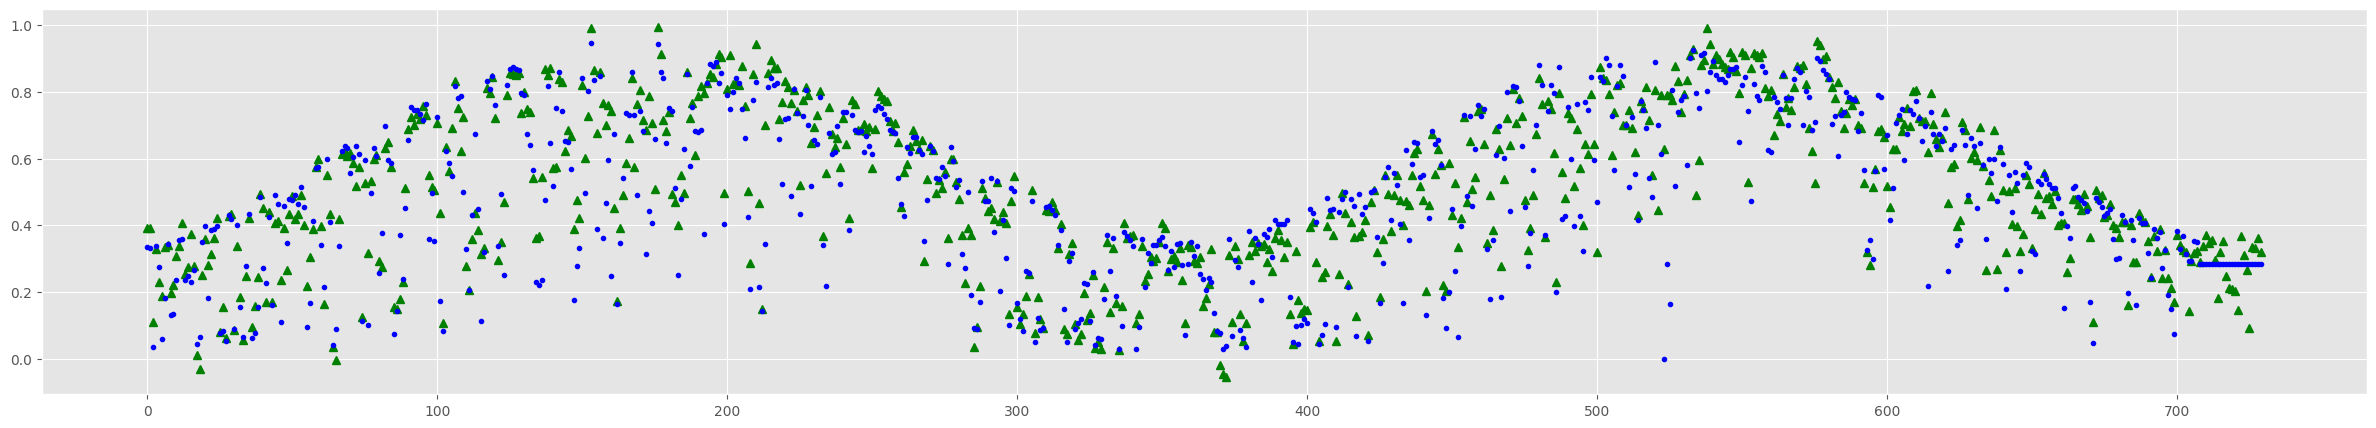

In [40]:
regrElastic = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )

start_time = time.time()
regrElastic.fit(X_train, y_train)
end_time = time.time()

y_pred = regrElastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrElastic.alpha_
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrElastic, 730)

Los resultados son ligeramente superiores al método Lasso, y la gráfica muestra que la predicción se ajusta a las pruebas

Se realiza la gráfica de coeficientes del modelo en función de la regularización

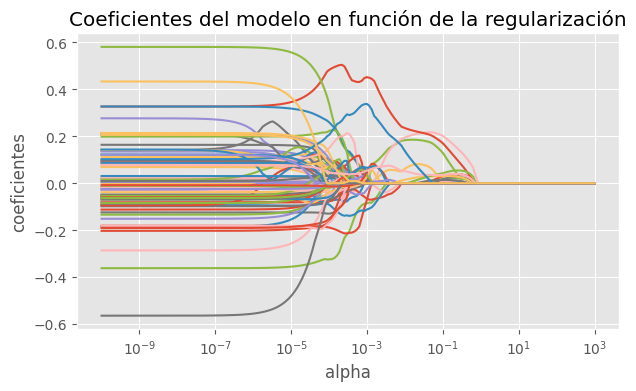

In [41]:
alphas = regrElastic.alphas
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

Se observa que la disminución del coeficiente no es acorde al aumento de alpha, hay variaciones de coeficientes a medida que aumente alpha

El siguiente gráfico muestra los coeficientes de la regresión ElasticNet

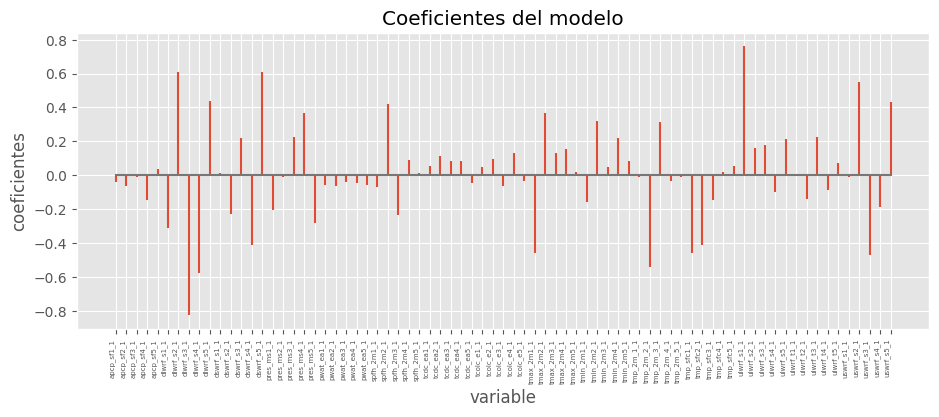

In [42]:
df_coeficientes = pd.DataFrame(
                        {'predictor': df_normalized.columns[:-1],
                         'coef': regrElastic.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Los coeficientes se encuentran en un término medio entre los modelos Lasso y Ridge

# Comparación de los modelos

A continuación se realiza una comparación de los modelos de regresión lineal.

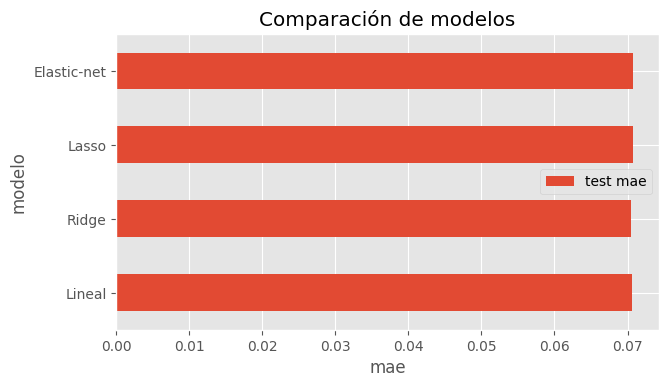

In [43]:
def mae(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return mean_absolute_error(y_test, y_test_pred)

mae_lineal = mae(y_test, pipe_regr.predict(X=X_test))
mae_ridge = mae(y_test, regrRidge.predict(X=X_test))
mae_lasso = mae(y_test, regrLasso.predict(X=X_test))
mae_elastic = mae(y_test, regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test mae': [mae_lineal, mae_ridge, mae_lasso, mae_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mae')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

En cuanto al error MAE, todos los métodos dan el mismo resultado

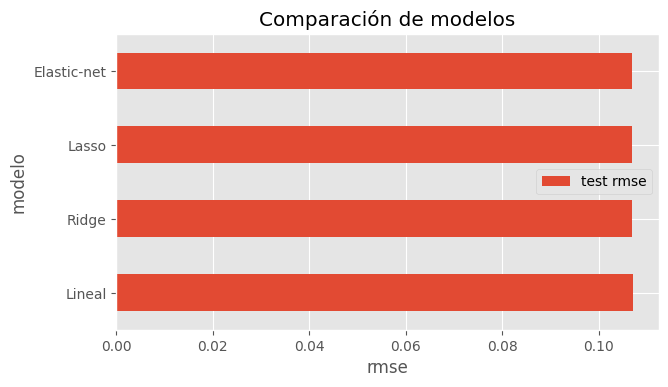

In [44]:
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_lineal = rmse(y_test, pipe_regr.predict(X=X_test))
rmse_ridge = rmse(y_test, regrRidge.predict(X=X_test))
rmse_lasso = rmse(y_test, regrLasso.predict(X=X_test))
rmse_elastic = rmse(y_test, regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

Para el error RMSE los modelos presentan el mismo comportamiento

In [45]:
# Coeficientes de los distintos modelos
# ==============================================================================
d = [["Lineal", np.count_nonzero(np.abs(reg_lin.coef_.flatten()) > 0.5)],
     ["Ridge", np.count_nonzero(np.abs(regrRidge.coef_.flatten()) > 0.5)],
     ["Lasso", np.count_nonzero(np.abs(regrLasso.coef_.flatten()) > 0.5)],
     ["Elastic Net", np.count_nonzero(np.abs(regrElastic.coef_.flatten()) > 0.5)]]

df = pd.DataFrame(d, columns = ['Modelo','Núm. predictores'])
print(df)

        Modelo  Núm. predictores
0       Lineal                 1
1        Ridge                29
2        Lasso                 8
3  Elastic Net                 7


 Si el coeficiente de un predictor es mayor a 0.5, significa que tiene un efecto relativamente grande en la variable de respuesta y es un predictor importante en el modelo.

Es importante encontrar un equilibrio adecuado entre la simplicidad y la precisión al elegir el número de predictores en un modelo. Un modelo con un número bajo de predictores puede tener un rendimiento inferior en términos de precisión y capacidad predictiva en comparación con modelos más complejos que utilizan más variables. Por otro lado, un modelo con un número bajo de predictores puede ser más sencillo y fácil de interpretar, lo que puede ser beneficioso en términos de comprensión y explicación del modelo.

# 5) Dimensionalidad del problema

La reducción de la dimensionalidad es una técnica que se utiliza para simplificar los datos mediante la eliminación de características irrelevantes o redundantes, o para visualizar los datos en un espacio de menor dimensión.

En nuestro caso, hemos decidido calcular las variables que tienen una varianza mas baja. Después definimos un umbral para eliminar dichas variables (variables con varianza inferior a 0.01) y por último creamos un nuevo dataset con las nuevas variables.

In [46]:
# Calcular la varianza de cada columna
varianzas = df_normalized.var()

# Ordenar las columnas por varianza de menor a mayor
columnas_ordenadas = varianzas.sort_values()

# Mostrar por pantalla todas las variables y su varianza
print(columnas_ordenadas)

umbral = 0.01 # Umbral de varianza mínima permitido

# Filtrar columnas con varianza menor al umbral
columnas_filtradas = varianzas[varianzas >= umbral].index

# Seleccionar solo las columnas con varianza mayor o igual al umbral
df_filtrado = df_normalized[columnas_filtradas]

varianzas2 = df_filtrado.var()

colum_ord = varianzas2.sort_values()

print(colum_ord)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_filtrado.iloc[:, :-1], df_filtrado.iloc[:, -1],
                                                    train_size=3650, shuffle=False)

apcp_sf5_1    0.002452
apcp_sf1_1    0.002536
apcp_sf2_1    0.002790
apcp_sf3_1    0.003319
tcolc_e2_1    0.003899
                ...   
spfh_2m2_1    0.065904
dswrf_s3_1    0.067040
uswrf_s2_1    0.070258
dswrf_s2_1    0.086753
uswrf_s1_1    0.114044
Length: 76, dtype: float64
uswrf_s3_1    0.013072
dswrf_s1_1    0.014700
uswrf_s5_1    0.015711
pres_ms3_1    0.016345
pres_ms4_1    0.016875
pres_ms5_1    0.017224
pres_ms2_1    0.017709
pres_ms1_1    0.018003
tmp_sfc3_1    0.031954
ulwrf_t1_1    0.032469
tmin_2m5_1    0.033360
tmax_2m1_1    0.033367
tmp_sfc1_1    0.033881
ulwrf_t4_1    0.034292
tmin_2m1_1    0.034540
tmp_sfc5_1    0.034581
tmp_2m_1_1    0.034683
tmin_2m2_1    0.034735
tmin_2m3_1    0.034770
ulwrf_s1_1    0.035559
tmp_2m_5_1    0.035874
ulwrf_t5_1    0.035933
ulwrf_t3_1    0.036324
tmp_sfc4_1    0.036549
ulwrf_s4_1    0.036689
ulwrf_t2_1    0.036738
tmax_2m3_1    0.037082
tmax_2m5_1    0.037278
tmp_2m_4_1    0.037294
tmax_2m4_1    0.037320
tmp_2m_3_1    0.037416
tmp_sfc

Para emplear este nuevo dataset reducido hemos decidido probarlo con el método KNN. Primero se evalúa con hiperparámetros por omision y luego evaluamos con MAE y RMSE como hemos hecho anteriormente.

## Hiperparámetros por omisión

In [47]:
# KNN con hiperparámetros por omisión

# Crear el objeto KNeighborsRegressor
knn = KNeighborsRegressor()

# Fijar la semilla para que el método sea reproducible
np.random.seed(53)

# Entrenar el modelo con los datos de entrenamiento y medir el tiempo
start_time = time.time()
knn.fit(X_train2, y_train2)
end_time = time.time()

# Realizar predicciones sobre los datos de prueba
y_pred2 = knn.predict(X_test2)

# Calcular las métricas de evaluación del modelo
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test2, y_pred2)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test2, y_pred2)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.7585757472129472
Error cuadrático medio (MSE): 0.013964153665798043
Raíz cuadrada del error cuadrático medio (RMSE): 0.11817002016500651
Mean Absolute Error (MAE): 0.0780981612715655
Tiempo de entrenamiento: 0.005975961685180664


## Modelo evaluado con MAE

In [50]:
param_grid = {'n_neighbors': np.arange(1, 45),
              'weights': ['uniform', 'distance'],
              'metric': ['manhattan', 'euclidean', 'minkowski'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_mean_absolute_error",
                   cv=ps,
                   n_jobs = -1,
                   verbose = 1)


start_time = time.time()
grid_search.fit(X_train2, y_train2)
end_time = time.time()

y_pred2 = grid_search.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.07351643523302238
Coeficiente de determinación del modelo: 0.7774247064426429
Error cuadrático medio (MSE): 0.012873916210011046
Raíz cuadrada del error cuadrático medio (RMSE): 0.11346328132929634
Mean Absolute Error (MAE): 0.07428738984649998
Tiempo de entrenamiento: 25.127715587615967


## Modelo evaluado con RMSE

In [51]:
param_grid = {'n_neighbors': np.arange(1, 45),
                'weights': ['uniform', 'distance'],
                'metric': ['manhattan', 'euclidean', 'minkowski'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_root_mean_squared_error",
                   cv=ps,
                   n_jobs = 1,
                   verbose = 1)

start_time = time.time()
grid_search.fit(X_train2, y_train2)
end_time = time.time()

y_pred2 = grid_search.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test2, y_pred2)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test2, y_pred2)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.10186057113763204
Coeficiente de determinación del modelo: 0.7746014129713661
Error cuadrático medio (MSE): 0.01303721754954684
Raíz cuadrada del error cuadrático medio (RMSE): 0.11418063561544418
Mean Absolute Error (MAE): 0.07460795947892515
Tiempo de entrenamiento: 73.57877135276794


Podemos observar que en la evaluación con parámetros por omisión, los resultados son mejores, sin embargo, cuando evaluamos con MAE y RMSE tanto el coeficiente de determinación del modelo coo los errores RMSE y MAE dan peores resultados que con el dataset sin eliminar variables. 

Esto puede deberse a varias causas. Es posible que las variables con baja varianza contengan información valiosa que es relevante para la predicción del modelo. Al eliminar estas variables, se pierde esa información y el modelo no puede hacer predicciones tan precisas. Por otro lado, es posible que la eliminación de variables con baja varianza haya provocado un sobreajuste del modelo a los datos de entrenamiento, lo que resulta en una menor capacidad del modelo para generalizar a datos nuevos y no vistos. También puede ocurrir que el umbral seleccionado no fuese el adecuado o que algunas variables con baja varianza sean redundantes y estén altamente correlacionadas con otras variables del conjunto de datos. Si se eliminan estas variables, la dependencia entre variables puede cambiar, lo que puede afectar la precisión del modelo.

Por lo tanto podemos concluir que en este caso no conviene eliminar variables con baja varianza, sin embargo, en caso de proceder de este modo estas serían las variables que tendría mas sentido eliminar aunque así se este asumiendo una penalización en el error.

# 6) Métodos avanzados

## SVR

SVM (Support Vector Machine) es un algoritmo de aprendizaje automático supervisado utilizado para la clasificación y regresión. Su objetivo es encontrar una línea o un hiperplano que separe los datos en diferentes clases de manera óptima.

Primero calculamos SVR con hiperparámetros por omisión.

In [52]:
# Creamos el modelo SVM lineal y lo ajustamos a los datos de entrenamiento
svm = SVR()

np.random.seed(53)
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.8123557455934429
Error cuadrático medio (MSE): 0.010853479601937431
Raíz cuadrada del error cuadrático medio (RMSE): 0.10418003456486963
Mean Absolute Error (MAE): 0.07022824494993012
Tiempo de entrenamiento: 0.49297666549682617


Las medidas obtenidas son, de momento, las mejores que se han obtenido de los métodos. Es por ello que se continua con el estudio de este método ya que puede ser un buen candidato al método final.

# SVR evaluado con MAE

SVR evaluado con MAE. Los hiperparámetros a ajustar son los siguientes:
- C: parámetro de regularización que controla la complejidad del modelo. Valores más pequeños de C generan modelos más regulares, mientras que valores mayores permiten un mayor ajuste a los datos de entrenamiento.
- gamma: Parámetro que controla el alcance de la influencia de un solo ejemplo de entrenamiento. Si gamma es bajo, entonces la influencia se extiende lejos en el conjunto de datos, lo que hace que los puntos lejanos tengan un mayor efecto en la predicción. Por otro lado, si gamma es alto, la influencia de un punto de datos se limita solo a su vecindario más cercano.

In [53]:
svr = SVR()

# Definir grilla de hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Realizar búsqueda de hiperparámetros
hpo_regr = GridSearchCV(svr, 
                        param_grid, 
                        scoring='neg_mean_absolute_error', 
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

np.random.seed(53)
start_time = time.time()
hpo_regr.fit(X_train, y_train)
end_time = time.time()

y_pred = hpo_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', hpo_regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
Mejores hiperparámetros: {'C': 10000, 'gamma': 0.001}
Coeficiente de determinación del modelo: 0.8105511471393245
Error cuadrático medio (MSE): 0.010957858883751337
Raíz cuadrada del error cuadrático medio (RMSE): 0.10467979214610304
Mean Absolute Error (MAE): 0.07027560453980917
Tiempo de entrenamiento: 57.15989971160889


Los resultados obtenidos son buenos en comparación con otros modelos. Aunque los resultados empeoran respecto al original. Los valores de los hiperparámetros se han ido añadiendo y ajustando al modelo de manera que probamos con varios resultados sin que tenga que hacer todas las combinaciones, con el objetivo de reducir el tiempo de entrenamiento. Es por ello que aunque C sea un límite, se ha probado con valores muy altos y los resultados siguen siendo los mismos.

# SVR evaluado con RMSE

Se evalua SVR con RMSE, con los mismos hiperparámetros que el apartado anterior.

In [54]:
svr = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}



# Definition of a 2-step process that self-adjusts 2 hyperpars
hpo_regr = GridSearchCV(svr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

np.random.seed(53)
start_time = time.time()
hpo_regr.fit(X_train, y_train)
end_time = time.time()

y_pred = hpo_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', hpo_regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
Mejores hiperparámetros: {'C': 1, 'gamma': 0.1}
Coeficiente de determinación del modelo: 0.8116582788147513
Error cuadrático medio (MSE): 0.010893821585652845
Raíz cuadrada del error cuadrático medio (RMSE): 0.10437347165660844
Mean Absolute Error (MAE): 0.07024640859549815
Tiempo de entrenamiento: 62.65599751472473


Los resultados siguen empeorando, aunque los hiperparámetros varían de una evalución a otra.

## Random forests

Random Forest es un algoritmo de aprendizaje automático que utiliza múltiples árboles de decisión para tomar una decisión final. Cada árbol en el bosque se entrena con un subconjunto aleatorio de las características y los datos de entrenamiento para evitar que el modelo se ajuste demasiado a los datos. Random Forest se utiliza en la clasificación, regresión y otras tareas de análisis de datos, y es especialmente útil cuando se tienen datos complejos y ruidosos.

Primero entrenamos y evaluamos con hiperparámetros por omisión.

In [55]:
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [56]:
regr_rf = RandomForestRegressor()
np.random.seed(53)
start_time = time.time()
regr_rf.fit(X_train, y_train)
end_time = time.time()

y_pred = regr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)


Coeficiente de determinación del modelo: 0.7995611743999708
Error cuadrático medio (MSE): 0.011593526867989158
Raíz cuadrada del error cuadrático medio (RMSE): 0.10767324118827834
Mean Absolute Error (MAE): 0.06933283790008478
Tiempo de entrenamiento: 36.682183027267456


Vemos que los resultados son aceptables, sin embargo, no llegan a mejorar los que obteníamos en SVM.

A continuación vamos a evaluar random forest con MAE y RMSE.

# Random forest evaluado con MAE

"n_estimators" es un parámetro clave en el algoritmo de Random Forest que representa el número de árboles de decisión que se utilizarán para construir el modelo. Cada árbol de decisión se entrena con una muestra aleatoria de los datos de entrenamiento y características, y luego se combina con los otros árboles para tomar una decisión final.

El valor predeterminado de n_estimators en la implementación de scikit-learn de Random Forest es 100, lo que significa que se utilizarán 100 árboles de decisión para construir el modelo. Sin embargo, este valor puede ser ajustado para mejorar el rendimiento del modelo. En este caso realizaremos validación cruzada para encontrar el mejor valor de n_estimators.

## Optimización de parámetros: n_estimators

Valor óptimo de n_estimators: 141


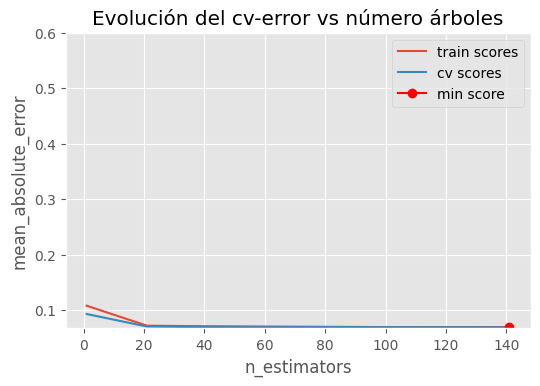

In [57]:
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(mean_absolute_error(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_mean_absolute_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_absolute_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
ax.set_ylim([None,0.6])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Como podemos observar en la gráfica, a partir de 20 el MAE no cambia considerablemente por lo que establecemos un valor de n_estimators de 20. Este valor lo utilizaremos a continuación para obtener el otro hiperparámetro max_features.

Este parámetro representa el número máximo de características (variables) que se deben considerar al dividir un nodo durante la construcción de cada árbol de decisión.

La idea detrás de limitar el número de características utilizadas en cada división es reducir la correlación entre los árboles y mejorar la diversidad del bosque, lo que puede aumentar su capacidad de generalización.

## Optimización de parámetros: max_features

Valor óptimo de max_features: 10


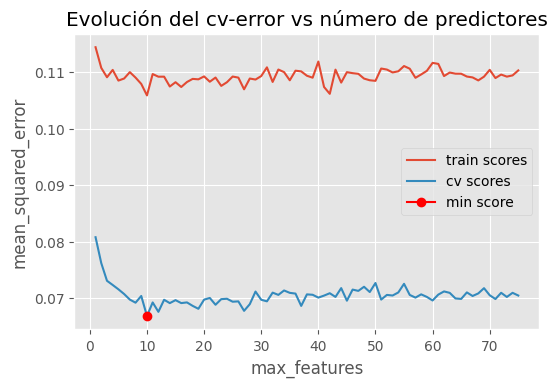

In [58]:
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 20,
                max_depth    = None,
                max_features = max_features,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_mean_absolute_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Analizando el gráico podemos entender que el mejor valor para max_features es 10.

## Búsqueda de parámetros con Random Search

Vamos a realizar una búsqueda de parámetros utilizando Random Search, ya que los parámetros pueden influirse entre sí, lo que hace que la búsqueda secuencial no sea la mejor opción.

In [59]:
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,76)}


regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=ps,
                         n_jobs=-1, 
                         verbose=1
                        )

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)


Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_features': 10, 'n_estimators': 68}
Coeficiente de determinación del modelo: 0.8028882195242412
Error cuadrático medio (MSE): 0.011401088167933058
Raíz cuadrada del error cuadrático medio (RMSE): 0.10677587821194943
Mean Absolute Error (MAE): 0.06846593598643454
Tiempo de entrenamiento: 41.97448182106018


Tras varias ejecuciones y probar con varios de los hiperparámetros que obteníamos, hemos decidido quedarnos con los siguientes valores:

n_estimators: 68
max_features: 10

Estos son los valores con los que obtenemos mejores resultados tanto en el coeficiente de determinacón como en los errores MAE y RMSE.

## Importancia por permutación

In [60]:
importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_mean_absolute_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,0.031550,0.000328,dswrf_s4_1
14,0.028955,0.000295,dswrf_s5_1
12,0.025902,0.000179,dswrf_s3_1
72,0.017941,0.000140,uswrf_s3_1
74,0.017763,0.000177,uswrf_s5_1
...,...,...,...
50,0.001307,0.000027,tmp_2m_1_1
55,0.001302,0.000024,tmp_sfc1_1
41,0.001074,0.000024,tmax_2m2_1
70,0.000808,0.000046,uswrf_s1_1


Las características que tienen una importancia media más alta son las que tienen el mayor impacto en el rendimiento del modelo. Estas características son las que el modelo utiliza más para hacer predicciones.

La desviación estándar de las importancias indica cuánto varía la importancia de una característica en diferentes repeticiones de la importancia de permutación. Una desviación estándar alta significa que la importancia de una característica es menos confiable, ya que cambia significativamente de una repetición a otra.

Si una característica tiene una importancia media cercana a cero, significa que tiene poco o ningún impacto en el rendimiento del modelo. Esto puede deberse a que la característica es redundante o no es relevante para hacer predicciones precisas.

Por lo tanto, las variables que se muestran en la tabla con valor inferior a 0.001 (valor que hemos considerado nosotros), no tienen un impacto significativo en el modelo y por lo tanto podrían ser eliminadas.

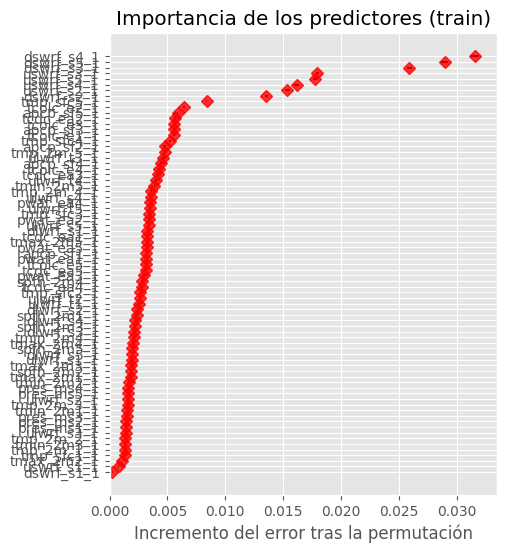

In [61]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

La gráfica representa la importancia de los predictores en el modelo de aprendizaje automático. El eje y del gráfico representa los nombres de los predictores y el eje x representa la importancia de cada predictor en el modelo. La importancia se mide como el incremento del error después de permutar aleatoriamente los valores del predictor. Los predictores más importantes se ubican en la parte superior del eje y, mientras que los predictores menos importantes se ubican en la parte inferior.

## Importancia por pureza

In [62]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_normalized.columns[:-1],
                             'importancia': regr.best_estimator_.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
13,dswrf_s4_1,0.138251
14,dswrf_s5_1,0.100349
12,dswrf_s3_1,0.099200
72,uswrf_s3_1,0.073988
71,uswrf_s2_1,0.065429
...,...,...
47,tmin_2m3_1,0.001559
51,tmp_2m_2_1,0.001521
50,tmp_2m_1_1,0.001492
70,uswrf_s1_1,0.001102


La salida muestra qué predictores son más importantes en el modelo ajustado y puede ayudar a los analistas a comprender qué variables influyen más en la predicción del modelo.

Al igual que en el apartado anterior, aquellas variables con una importancia baja no afectarían significativamente al modelo por lo que se podrían eliminar.

# Random forest evaluado con RMSE

A continuación repetiremos todo lo anterior pero evaluaremos con RMSE. n_estimators y max_features ya se han explicado anteriormente.

## Optimización de parámetros: n_estimators

Mean absolute error (MAE):  [0.15695840790200685, 0.11025751414578484, 0.10950754019737863, 0.10887793565524674, 0.10834645084244297, 0.10758826028576376, 0.10764079275269198, 0.10764685772356505]
Valor óptimo de n_estimators: 141


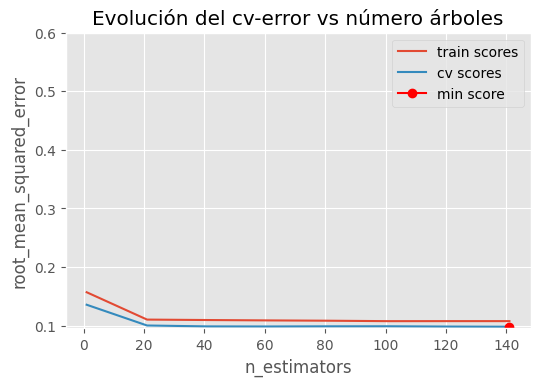

In [64]:
train_scores = []
cv_scores    = []

def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) 

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

print("Mean absolute error (MAE): ", train_scores)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
ax.set_ylim([None,0.6])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Volvemos a obtener un valor de 20 para n_estimators y lo utilizaremos para sacar max_features.

## Optimización de parámetros: max_features

Valor óptimo de max_features: 10


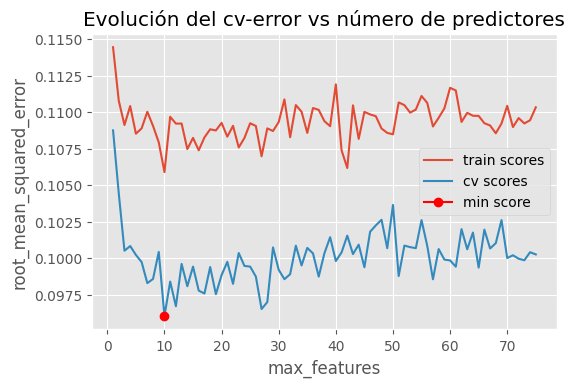

In [65]:
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 20,
                max_depth    = None,
                max_features = max_features,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

## Búsqueda de parámetros con Random Search

Como hemos hecho antes, vamos a realizar una búsqueda de parámetros utilizando Random Search, ya que los parámetros pueden influirse entre sí, lo que hace que la búsqueda secuencial no sea la mejor opción.

In [66]:
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,76)}


regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=ps,
                         n_jobs=-1, 
                         verbose=1
                        )

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_features': 23, 'n_estimators': 73}
Coeficiente de determinación del modelo: 0.8021607592652931
Error cuadrático medio (MSE): 0.011443164996273385
Raíz cuadrada del error cuadrático medio (RMSE): 0.10697273015247104
Mean Absolute Error (MAE): 0.06914342324290965
Tiempo de entrenamiento: 59.457131147384644


Los resultados obtenidos son los mismos que al evaluar con MAE.

## Importancia por permutación

In [67]:
importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,0.049734,0.000390,dswrf_s4_1
14,0.048724,0.000357,dswrf_s5_1
12,0.037545,0.000247,dswrf_s3_1
73,0.025730,0.000203,uswrf_s4_1
72,0.025472,0.000130,uswrf_s3_1
...,...,...,...
46,0.000901,0.000022,tmin_2m2_1
61,0.000859,0.000043,ulwrf_s2_1
50,0.000843,0.000031,tmp_2m_1_1
70,0.000486,0.000046,uswrf_s1_1


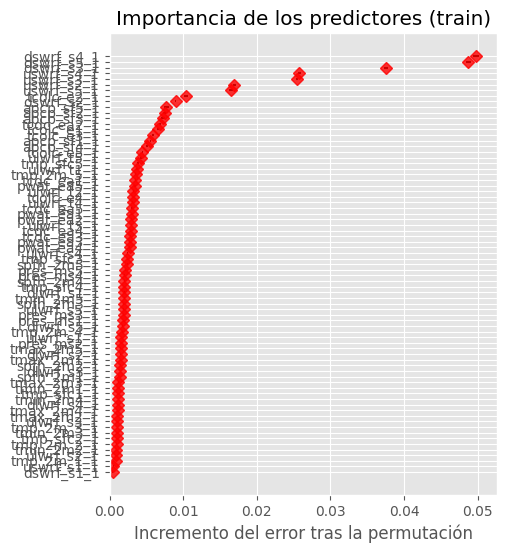

In [68]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

## Gradient boosting

Gradient Boosting es un algoritmo de aprendizaje automático que se utiliza en problemas de regresión y clasificación. Es una técnica de conjunto que combina varios modelos débiles para construir un modelo predictivo más robusto. Es un algoritmo muy potente y preciso en la predicción, especialmente en conjuntos de datos con una gran cantidad de características. Sin embargo, también puede ser muy sensible a los hiperparámetros y requiere ajustes cuidadosos para obtener los mejores resultados.

In [69]:
# Para dibujar las predicciones y los valores reales
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend();

Coeficiente de determinación del modelo: 0.7937615273691206
Error cuadrático medio (MSE): 0.011928982653442556
Raíz cuadrada del error cuadrático medio (RMSE): 0.10921988213435573
Mean Absolute Error (MAE): 0.07150572656838797
Tiempo de entrenamiento: 8.642549991607666


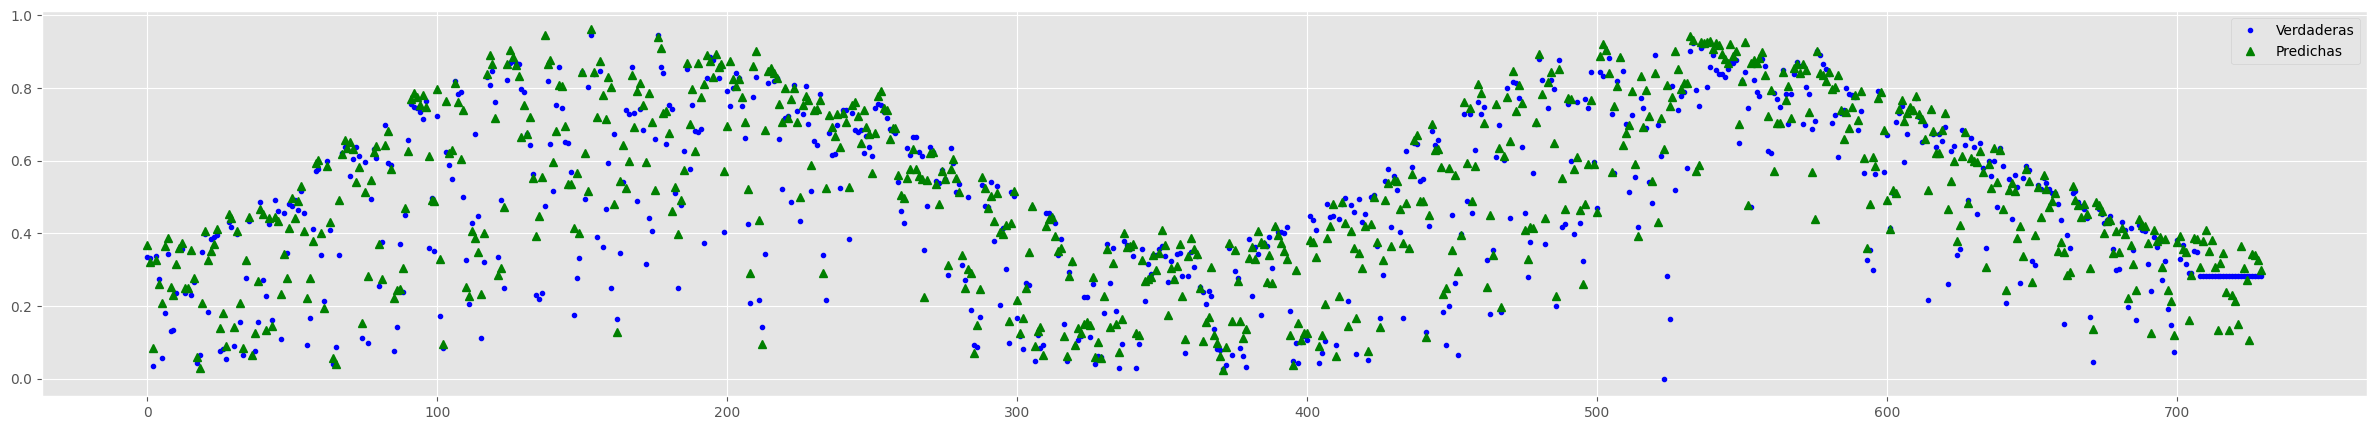

In [70]:
# Gradient boosting con ajuste de hiperpararametros por omisión
regr_gb = HistGradientBoostingRegressor()

np.random.seed(53)
start_time = time.time()
regr_gb.fit(X_train, y_train)
end_time = time.time()

y_pred = regr_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr_gb, 730)

Los errores son superiores a los de los demás métodos. El coeficiente de determinación es ligeramente bajo, sin embargo parece mostrar una buena predicción en la gráfica.

# Gradient boosting evaluado con MAE

Se evalúa gradient boosting con MAE. Los hiperparámetros son:
- max_depth: controla la profundidad máxima de los árboles de decisión individuales en el ensamblado.
- learning_rate: controla la tasa de aprendizaje utilizada por el algoritmo de impulso.
- l2_regularization: controla la cantidad de regularización L2 aplicada a los pesos de los árboles.
- max_leaf_nodes: controla el número máximo de hojas en los árboles de decisión individuales en el ensamblado.

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_leaf_nodes': 30, 'max_depth': 1, 'learning_rate': 0.2, 'l2_regularization': 1}
Coeficiente de determinación del modelo: 0.8013285748243586
Error cuadrático medio (MSE): 0.011491299147160636
Raíz cuadrada del error cuadrático medio (RMSE): 0.10719747733580598
Mean Absolute Error (MAE): 0.06978635916771504
Tiempo de entrenamiento: 27.907448291778564


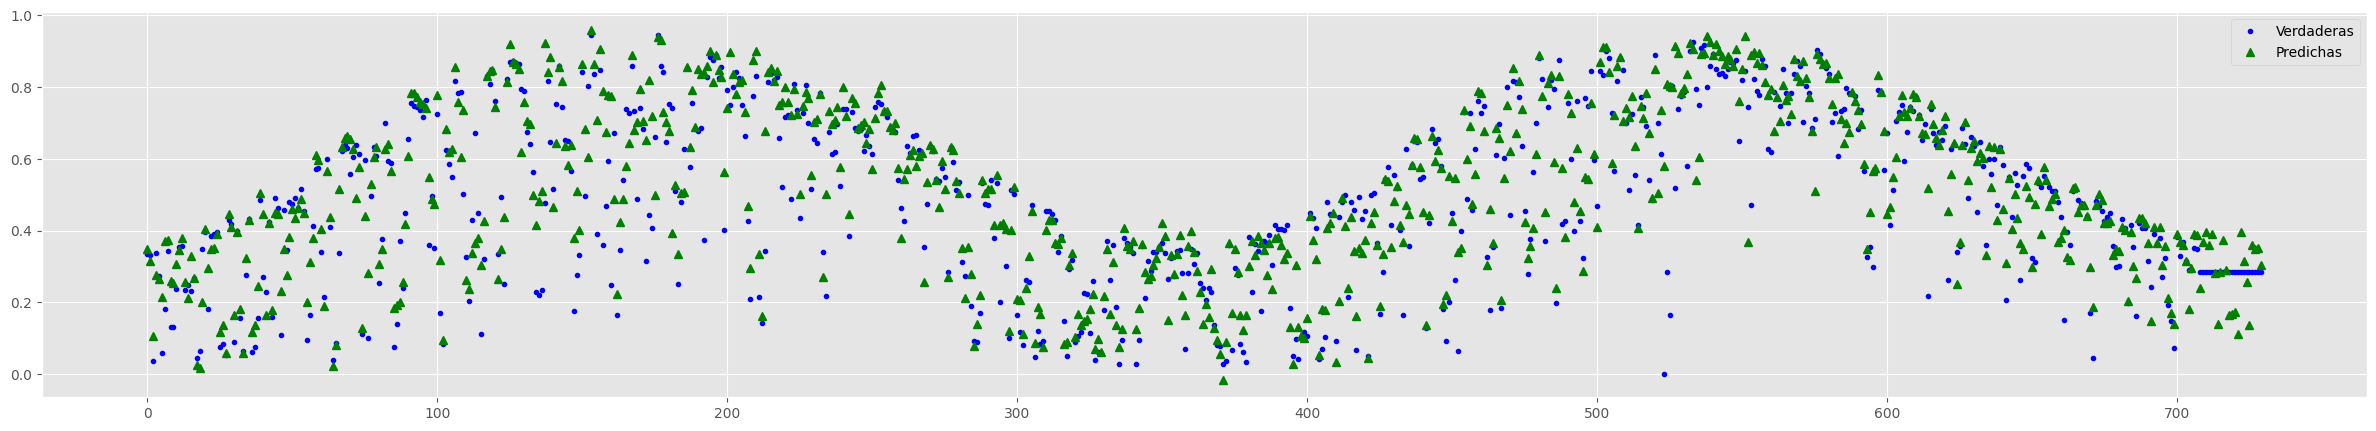

In [71]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }


regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 53,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=ps,
                           n_jobs=-1,
                           verbose=1)

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr, 730)

Los resultados son mejores que en el ajuste de hiperparámetros por omisión, lo cual es correcto puesto que se evalúa con los mejores hiperparámetros.

## Importancia por permutación

In [72]:
importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_mean_absolute_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )

df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,0.067554,0.000910,dswrf_s4_1
12,0.035699,0.000729,dswrf_s3_1
14,0.013413,0.000390,dswrf_s5_1
31,0.004915,0.000090,tcdc_ea2_1
21,0.004902,0.000109,pwat_ea2_1
...,...,...,...
70,0.000000,0.000000,uswrf_s1_1
9,0.000000,0.000000,dlwrf_s5_1
46,0.000000,0.000000,tmin_2m2_1
61,-0.000003,0.000004,ulwrf_s2_1


Al igual que en Random Forest, se muestran las variables con su importancia media. Loa valores cambian al ser un modelo diferente e igualmente se pueden eliminar aquellas variables que no afectan de forma significativa al modelo.

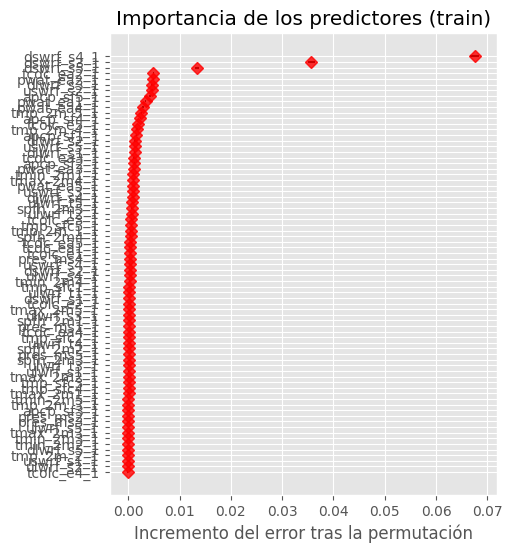

In [73]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

# Gradient boosting evaluado con RMSE

Se evalua gradient boosting con RMSE. Los hiperparámetros ajustados son los mismos que en el apartado anterior

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_leaf_nodes': 30, 'max_depth': 1, 'learning_rate': 0.1, 'l2_regularization': 1}
Coeficiente de determinación del modelo: 0.8057985499148734
Error cuadrático medio (MSE): 0.011232752549933325
Raíz cuadrada del error cuadrático medio (RMSE): 0.10598468073232718
Mean Absolute Error (MAE): 0.06883148286984242
Tiempo de entrenamiento: 17.69569706916809


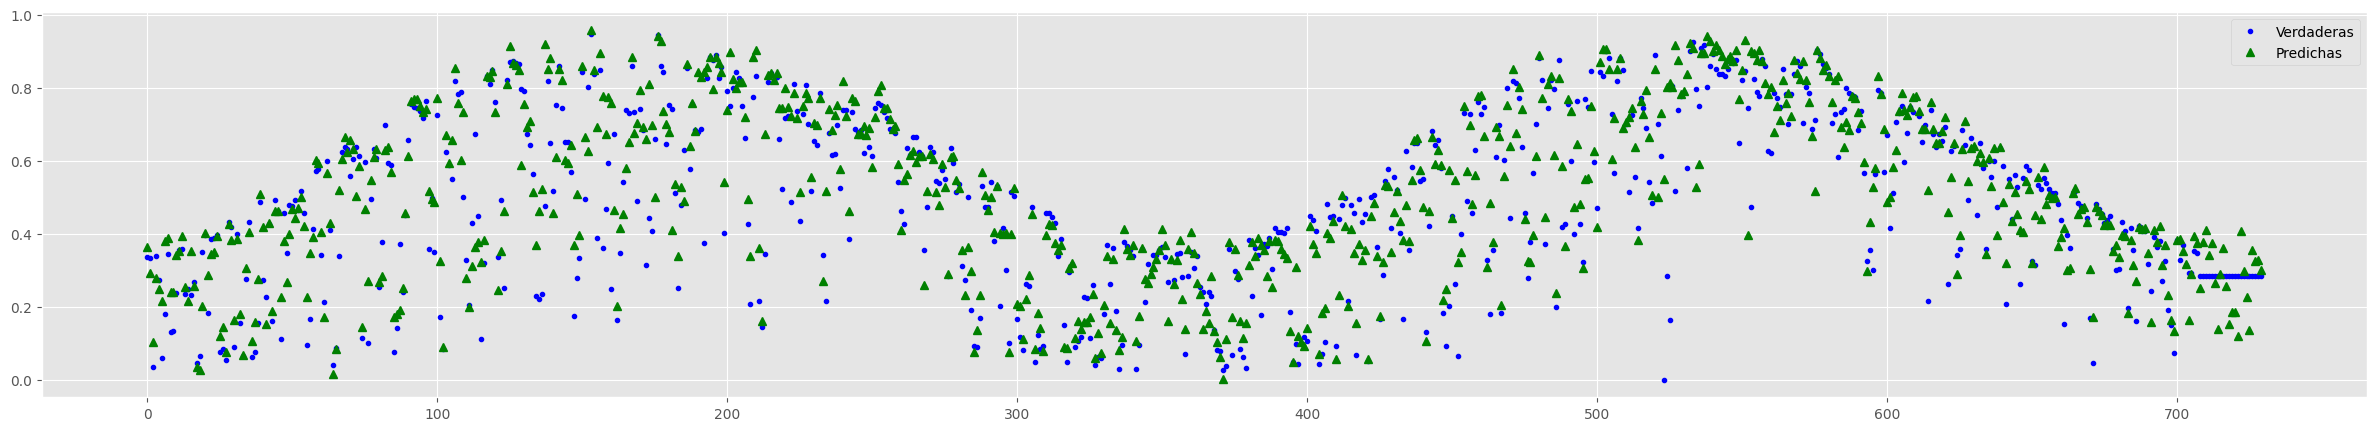

In [74]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }


regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 53,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=ps,
                           n_jobs=-1,
                           verbose=1)

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr, 730)

En esta evaluación los errores MAE y RMSE son inferiores que en la anterior prueba, lo cual conlleva a una mejora del modelo en el caso de la evaluación en RMSE. 

## Importancia por permutación

In [75]:
importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )

df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,0.063129,0.000744,dswrf_s4_1
12,0.034152,0.000449,dswrf_s3_1
14,0.012053,0.000191,dswrf_s5_1
71,0.003908,0.000104,uswrf_s2_1
4,0.003884,0.000292,apcp_sf5_1
...,...,...,...
42,0.000000,0.000000,tmax_2m3_1
70,0.000000,0.000000,uswrf_s1_1
41,0.000000,0.000000,tmax_2m2_1
9,0.000000,0.000000,dlwrf_s5_1


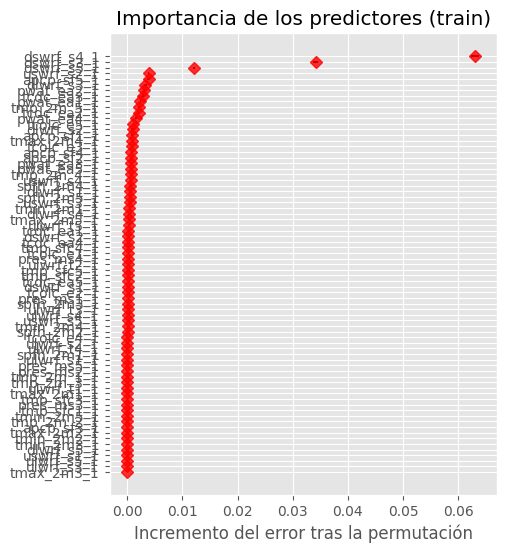

In [76]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

# XGBoost evaluado con MAE

XGBoost es una técnica de aprendizaje automático basada en árboles de decisión, que utiliza un algoritmo de boosting para mejorar el rendimiento y la precisión del modelo.

Los hiperparámetros son: 
- max_depth: la profundidad máxima de cada árbol en el modelo. Controla la complejidad del modelo y previene el sobreajuste.
- learning_rate: la tasa de aprendizaje que controla la contribución de cada árbol al modelo.
- n_estimators: el número de árboles en el modelo. 
- subsample: el porcentaje de observaciones que se deben muestrear aleatoriamente para cada árbol. 

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 292, 'subsample': 1}
Coeficiente de determinación del modelo: 0.8013134395452661
Error cuadrático medio (MSE): 0.011492174582667148
Raíz cuadrada del error cuadrático medio (RMSE): 0.10720156054212619
Mean Absolute Error (MAE): 0.06903906095927553
Tiempo de entrenamiento: 36.96503210067749


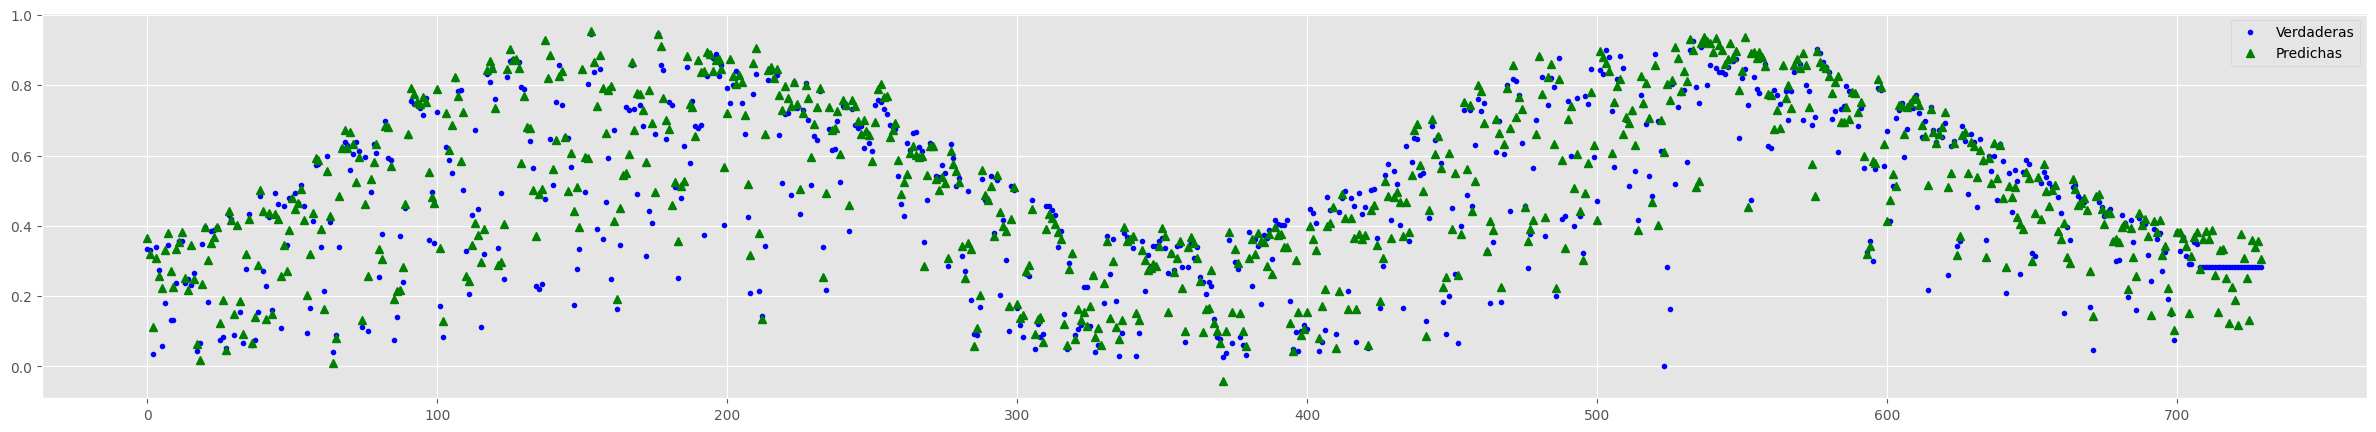

In [77]:
# espacio de búsqueda
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 53),
    param_distributions= param_grid,
    scoring    = 'neg_mean_absolute_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = ps,
    verbose    = 1,
)

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

Las medidas han subido con respecto al modelo anterior evaluado con RMSE.

#  XGBoost evaluado con RMSE

Se evalúa con RMSE. Los hiperparámetros son los mismos que en la evaluación con MAE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 292, 'subsample': 1}
Coeficiente de determinación del modelo: 0.8013134395452661
Error cuadrático medio (MSE): 0.011492174582667148
Raíz cuadrada del error cuadrático medio (RMSE): 0.10720156054212619
Mean Absolute Error (MAE): 0.06903906095927553
Tiempo de entrenamiento: 34.889182567596436


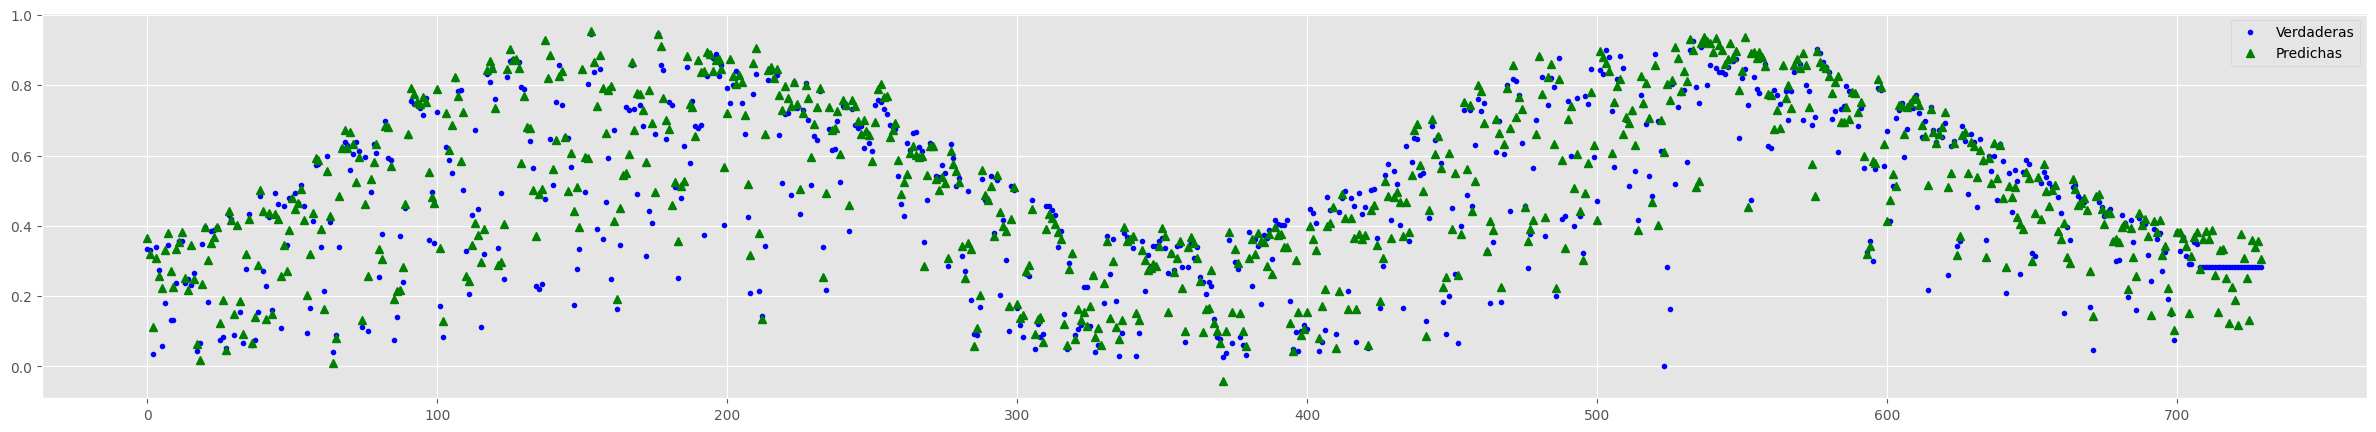

In [78]:
# espacio de búsqueda
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 53),
    param_distributions= param_grid,
    scoring    = 'neg_root_mean_squared_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = ps,
    verbose    = 1,
)

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

Los mejores hiperparámetros son iguales que en la evaluación con MAE, por lo que las medidas resultan las mismas. El tiempo de ejecución de esta evaluación es superior al de MAE.

# LightGBM evaluado con MAE

LightGBM (Light Gradient Boosting Machine) es un algoritmo de aprendizaje automático de boosting basado en árboles de decisión, al igual que XGBoost. Sin embargo, LightGBM utiliza una estrategia de construcción de árboles de decisión diferente a la de XGBoost, lo que lo hace más eficiente en términos de tiempo de entrenamiento y uso de memoria.

LightGBM utiliza una técnica llamada "Leaf-wise" en lugar de la técnica "Level-wise" utilizada por XGBoost, lo que significa que construye árboles de decisión de forma más eficiente, comenzando por las hojas con mayor ganancia. Además, LightGBM también utiliza un algoritmo de histograma para discretizar los valores de características, lo que reduce el costo computacional de la búsqueda de puntos de corte óptimos.

A continuación, vamos a evaluar tanto con MAE como con RMSE. Empleamos RandomizedSearchCV para la búsqueda de hiperparámetros. Los hiperparámetros a buscar son los siguientes:

- 'n_estimators': Representa el número de árboles de decisión que se van a construir.
- 'max_depth': Representa la profundidad máxima de cada árbol de decisión que se construye.
- 'subsample': Controla la fracción de los datos de entrenamiento que se utiliza para entrenar cada árbol de    decisión. 
- 'learning_rate': Determina la cantidad de peso que se asigna a cada actualización de los parámetros del modelo durante el entrenamiento.
- 'boosting_type': Especifica el tipo de algoritmo de refuerzo a utilizar durante el entrenamiento del modelo.

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1428, 'subsample': 0.5}
Coeficiente de determinación del modelo: 0.7981166969788686
Error cuadrático medio (MSE): 0.011677076488386404
Raíz cuadrada del error cuadrático medio (RMSE): 0.10806052233996652
Mean Absolute Error (MAE): 0.07037770046506135
Tiempo de entrenamiento: 61.01350665092468


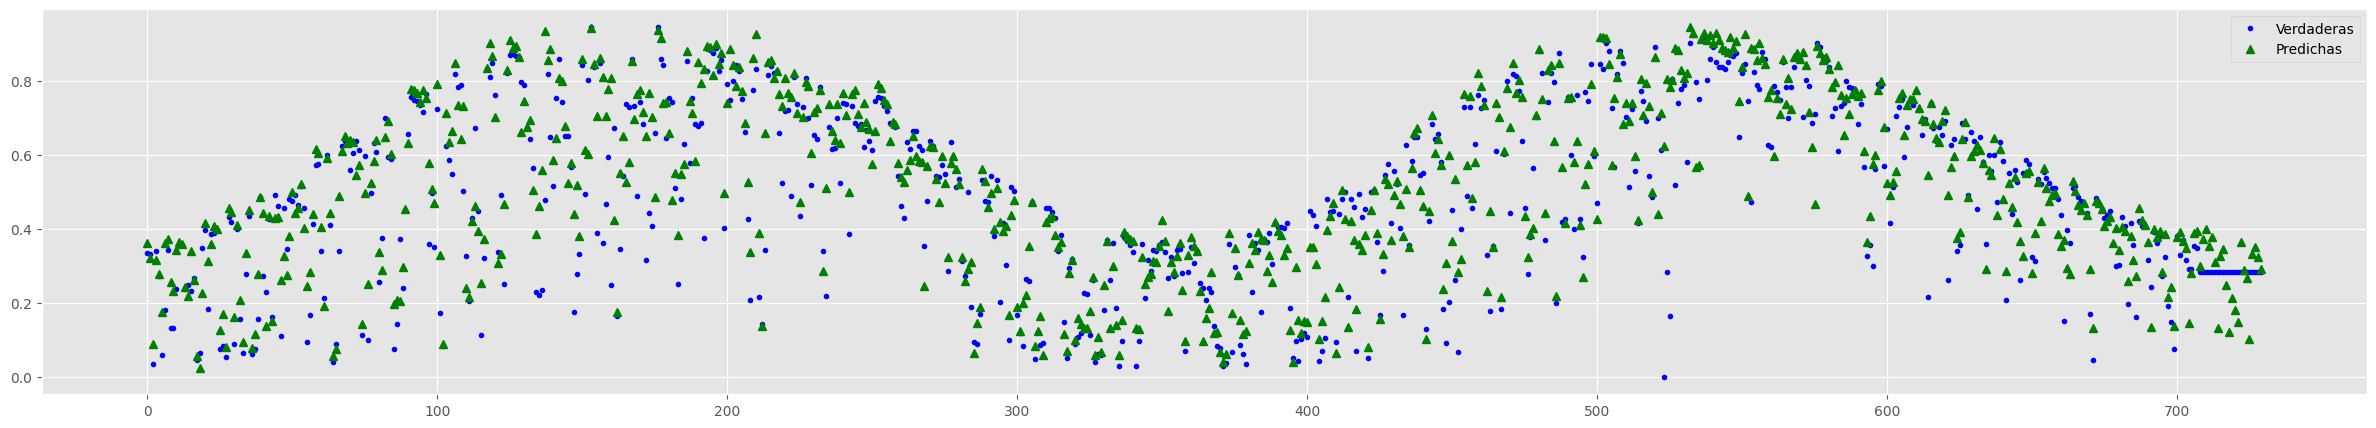

In [79]:
param_grid = {'n_estimators'     : sp_randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }



grid = RandomizedSearchCV(
        estimator  = LGBMRegressor(random_state=42),
        param_distributions = param_grid,
        scoring    = 'neg_mean_absolute_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = ps, 
        verbose    = 1,
        return_train_score = True,
       )

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

# LightGBM evaluado con RMSE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 4318, 'subsample': 1}
Coeficiente de determinación del modelo: 0.7957032772479016
Error cuadrático medio (MSE): 0.011816670433875456
Raíz cuadrada del error cuadrático medio (RMSE): 0.1087045097218853
Mean Absolute Error (MAE): 0.07011575900878897
Tiempo de entrenamiento: 41.09015893936157


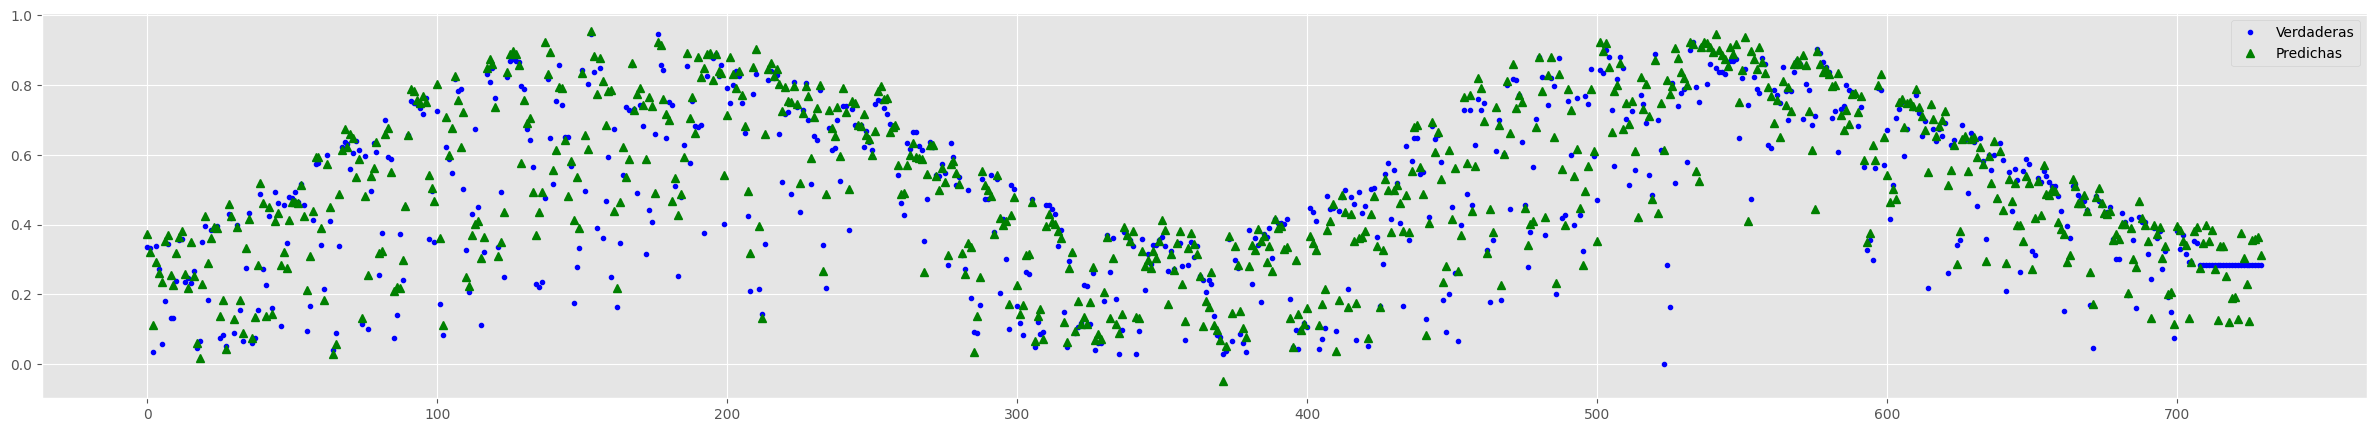

In [80]:
param_grid = {'n_estimators'     : sp_randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }



grid = RandomizedSearchCV(
        estimator  = LGBMRegressor(random_state=42),
        param_distributions = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = ps, 
        verbose    = 1,
        return_train_score = True,
       )

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

Vemos que el resultado de ejecutar tanto con MAE como con RMSE es inferior a otros modelos anteriores.

# 8) Modelo final

In [81]:
comp_df = pd.read_csv("comp_st8ns1.txt.bz2",
 compression="bz2",
index_col=0)

scaler = MinMaxScaler()
df_comp_normalized = scaler.fit_transform(comp_df)
df_disp_normalized = scaler.fit_transform(disp_df)
df_new_comp = pd.DataFrame(df_comp_normalized, columns=comp_df.columns)
df_new_disp = pd.DataFrame(df_disp_normalized, columns=disp_df.columns)

X = df_new_disp.drop(columns = 'salida')
y = df_new_disp['salida']


In [82]:
# Creamos el modelo SVM lineal y lo ajustamos a los datos de entrenamiento
modelo_final = SVR(C=1, gamma=0.1)

np.random.seed(53)
start_time = time.time()
modelo_final.fit(X, y)
end_time = time.time()

In [83]:
pickle.dump(modelo_final, open('modelo_final.pkl', 'wb'))